In [0]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#from bubbly.bubbly import bubbleplot 
#from __future__ import division
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [0]:
data=pd.read_csv('athlete_events.csv')
regions=pd.read_csv('noc_regions.csv')

In [0]:
data.head(7)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [0]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [0]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Print columns with the Null values


In [0]:
print(data.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


We find that height, weight and Age have a lot of missing values. Medals have a NaN in about 2,31,333 rows. These can be explained since not all participating athletes would win medals. Let's replace these missing values by 'Did not win' or 'DNW'

In [0]:
data['Medal'].fillna('DNW',inplace=True )

In [0]:
print(data.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


### 2) NOC - National Olympic Commitee 
NOC is responsible for their country to participate .
Are all the NOC's linked to unique teams . We can find out by taking Team AND NOC column and doing a value count

In [0]:
print(data.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


A master of NOC to country mapping is used to correct this.

The NOC data has the NOC code and the corresponding Country Name. The first five rows of the data are shown below -    
    

In [0]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Rename region to county and drop notes column    
    

In [0]:
regions.drop('notes',axis=1,inplace=True )

In [0]:
regions.rename(columns={'region':'Country'},inplace=True)

In [0]:
regions.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


## Merging


In [0]:
data_merge=data.merge(regions,left_on='NOC',right_on='NOC',how='left')

In [0]:
 #Do we have NOCs that didnt have a matching country in the master?
data_merge.loc[data_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [0]:
# Replace missing Teams by the values above.
#data_merge.loc[data_merge['Country'].isnull(), ['Country']] = data_merge['Team']

data_merge['Country'] = np.where(data_merge['NOC']=='SGP', 'Singapore', data_merge['Country'])
data_merge['Country'] = np.where(data_merge['NOC']=='ROT', 'Refugee Olympic Athletes', data_merge['Country'])
data_merge['Country'] = np.where(data_merge['NOC']=='UNK', 'Unknown', data_merge['Country'])
data_merge['Country'] = np.where(data_merge['NOC']=='TUV', 'Tuvalu', data_merge['Country'])



In [0]:
data_merge.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


##  Medals


### The 3 types of medals are Gold, Silver,Bronze


In [0]:
data_merge['Medal'].unique()

array(['DNW', 'Gold', 'Bronze', 'Silver'], dtype=object)

### Medal distribution by Country

In [0]:
tmp = data_merge.groupby(['Country', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()

In [0]:
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

def draw_map(dataset, title, colorscale):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode='country names',
                z = dataset['ID'],
                text = dataset['Country'],
                autocolorscale =False,
                reversescale = True,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Medals',
                    tickprefix = '')
            )
    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'natural earth'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)


#### Let's plot the countries with Gold, Silver and Bronze medals.



In [0]:
draw_map(dfG, "Countries with Gold Medals",'Greens')


In [0]:
draw_map(dfS, "Countries with Silver Medals",'Greys')


Countries with most medal

In [0]:
draw_map(dfB, "Countries with Bronze Medals",'Reds')


## Gold Medals 
Creating goldmedals dataframe based on atheletes that have won gold medals only

In [0]:
goldmedals=data_merge[data_merge.Medal=='Gold']
goldmedals.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold,Norway


#### The no of gold medals won in each sport over the entire dataset


In [0]:

totalgoldmedals=goldmedals.Sport.value_counts().reset_index(name='Country')
totalgoldmedals.head(5)

,index,Country
0,Athletics,1339
1,Swimming,1099
2,Rowing,978
3,Gymnastics,791
4,Fencing,594


### Gold medals per country 

In [0]:

#the total no of gold medals won per country over the years 
totalgoldmedals=goldmedals.Country.value_counts().reset_index(name='Medal').head(5)
totalgoldmedals

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


## Gold medals per country ( bargraph)

Text(0.5, 1.0, 'Medals per Country')

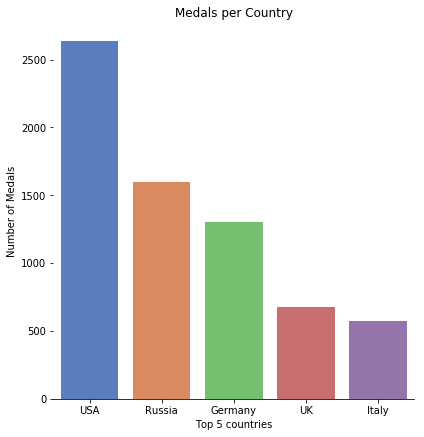

In [0]:
g = sns.catplot(x="index", y="Medal", data=totalgoldmedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

### Let's show the number of medals (Gold, Silver, Bronze) per Olympic edition.



In [0]:
tmp = data_merge.groupby(['Year', 'City','Season', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

In [0]:
dfG.head()


,Year,City,Season,Medal,ID
2,1896,Athina,Summer,Gold,62
6,1900,Paris,Summer,Gold,201
10,1904,St. Louis,Summer,Gold,173
14,1906,Athina,Summer,Gold,157
18,1908,London,Summer,Gold,294


In [0]:
traceG = go.Bar(
    x = dfG['Year'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['City']+ " (" + dfG['Season'] + ")",
)
traceS = go.Bar(
    x = dfS['Year'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City']+ " (" + dfS['Season'] + ")",
)

traceB = go.Bar(
    x = dfB['Year'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['City']+ " (" + dfB['Season'] + ")",
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

### Let's also show the number of medals per sport. We will show separately the number of medals for Gold, Silver and Bronze.

In [0]:
tmp = data_merge.groupby(['Sport', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

In [0]:
traceG = go.Bar(
    x = dfG['Sport'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['Sport'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['Sport'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['Sport'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['Sport'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['Sport'],
   # orientation = 'h'
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per sport',
          xaxis = dict(title = 'Sport', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),), 
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=900,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

## Splitting the Data into Summer & Winter Olympics


In [0]:
summer = data_merge[data_merge.Season=='Summer']
winter = data_merge[data_merge.Season=='Winter']

In [0]:
summer.head(2)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China


### Who is the heaviest athelete?

In [0]:
data_merge['Weight'].max()
data_merge[data_merge['Weight']==214].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,DNW,Guam
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,DNW,Guam


### Counting the number of countries participated in each sport over the years 

In [0]:

dfs=summer.groupby('Sport')['Country'].nunique()

print(dfs)

Sport
Aeronautics                1
Alpinism                   2
Archery                   93
Art Competitions          50
Athletics                206
Badminton                 66
Baseball                  16
Basketball                60
Basque Pelota              1
Beach Volleyball          41
Boxing                   162
Canoeing                  90
Cricket                    2
Croquet                    1
Cycling                  134
Diving                    72
Equestrianism             69
Fencing                   91
Figure Skating            11
Football                  85
Golf                      41
Gymnastics                85
Handball                  41
Hockey                    38
Ice Hockey                 7
Jeu De Paume               2
Judo                     170
Lacrosse                   3
Modern Pentathlon         52
Motorboating               2
Polo                       9
Racquets                   1
Rhythmic Gymnastics       44
Roque                      1
Rowing  

#### The 3 Most popular sports in Summer Olympics :

In [0]:
dfs.sort_values(ascending=False).head(3)

Sport
Athletics    206
Swimming     188
Judo         170
Name: Country, dtype: int64

In [0]:
winter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands


In [0]:
dfw=winter.groupby('Sport')['Country'].nunique()

print(dfw)

Sport
Alpine Skiing                94
Alpinism                      4
Biathlon                     47
Bobsleigh                    47
Cross Country Skiing         74
Curling                      16
Figure Skating               48
Freestyle Skiing             40
Ice Hockey                   29
Luge                         44
Military Ski Patrol           6
Nordic Combined              26
Short Track Speed Skating    33
Skeleton                     28
Ski Jumping                  32
Snowboarding                 35
Speed Skating                36
Name: Country, dtype: int64


#### The 3 Most popular sports in Winter Olympics :

In [0]:
dfw.sort_values(ascending=False).head(3)

Sport
Alpine Skiing           94
Cross Country Skiing    74
Figure Skating          48
Name: Country, dtype: int64










### Grouping/Finding the events 


In [0]:
print(goldmedals['Event'].count())

13372


In [0]:
print(goldmedals['Event'].unique())

["Tug-Of-War Men's Tug-Of-War" "Gymnastics Men's Team All-Around"
 "Gymnastics Men's Horse Vault" "Gymnastics Men's Pommelled Horse"
 "Alpine Skiing Men's Super G" "Alpine Skiing Men's Combined"
 "Handball Women's Handball" "Speed Skating Men's 1,500 metres"
 'Sailing Mixed 8 metres' "Cycling Men's Road Race, Team"
 "Canoeing Men's Kayak Fours, 1,000 metres" "Handball Men's Handball"
 "Football Men's Football" "Water Polo Men's Water Polo"
 'Sailing Mixed Two Person Heavyweight Dinghy'
 "Rowing Men's Quadruple Sculls" "Rowing Men's Double Sculls"
 "Rowing Men's Coxed Pairs" "Golf Women's Individual"
 "Hockey Men's Hockey" "Wrestling Men's Featherweight, Freestyle"
 "Boxing Men's Light-Welterweight"
 "Wrestling Men's Bantamweight, Freestyle" "Basketball Men's Basketball"
 "Athletics Men's Hammer Throw" "Nordic Combined Men's Team"
 "Ice Hockey Men's Ice Hockey" "Rowing Men's Coxed Eights"
 "Athletics Men's Marathon" "Baseball Men's Baseball"
 "Wrestling Men's Middleweight, Freestyle"
 "


## Athletes participation by gender over years for Olympics<br>

Women participated for the first time at the 1900 Paris Games with the inclusion of women's events in lawn tennis and golf. Women's athletics and gymnastics debuted at the 1928 Olympics. Over time more women's events were added. In 2012, women's boxing was introduced, resulting in no remaining sports that do not include events for women.

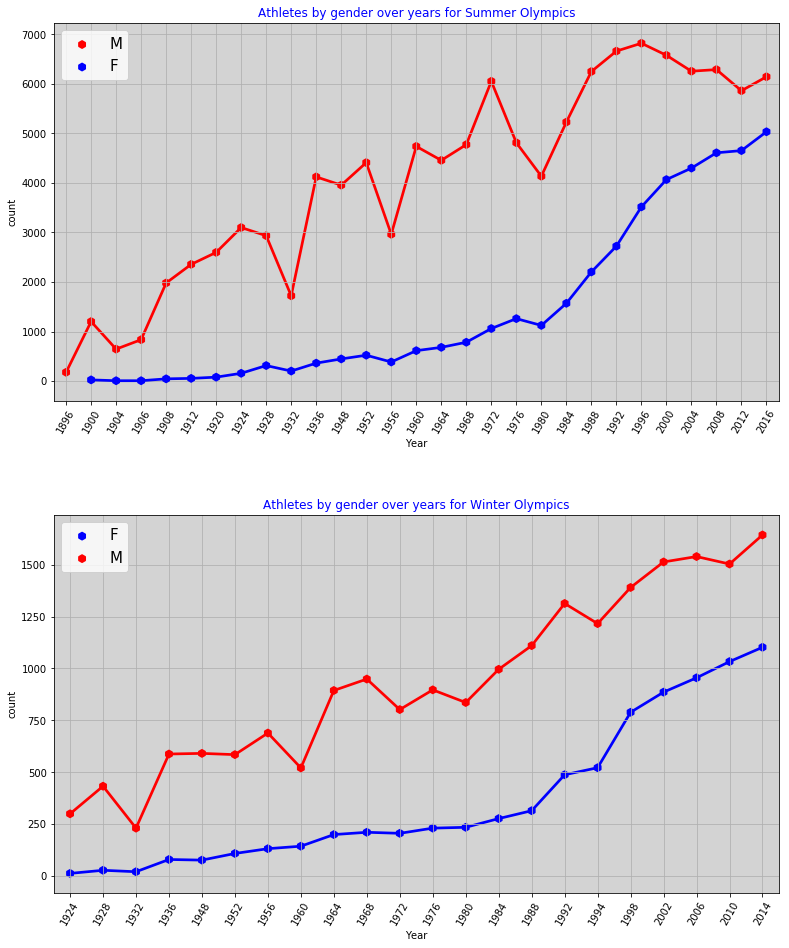

In [0]:
sum_gc = summer.groupby(["Year","Sex"])["ID"].nunique().reset_index()
win_gc = winter.groupby(["Year","Sex"])["ID"].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax = sns.pointplot(x = sum_gc["Year"] , y = sum_gc["ID"],
                   markers="h" , hue = sum_gc["Sex"],palette = ["r","b"])
plt.grid(True)
plt.xticks(rotation = 60)
ax.set_facecolor("lightgrey")
plt.ylabel("count")
plt.title("Athletes by gender over years for Summer Olympics",color="b")
plt.legend(loc = "best" ,prop={"size":15})

plt.subplot(212)
ax1 = sns.pointplot(x = win_gc["Year"] , y = win_gc["ID"],
                    markers="h",palette = ["b","r"],
                   hue = win_gc["Sex"])
plt.xticks(rotation = 60)
ax1.set_facecolor("lightgrey")
plt.grid(True)
plt.ylabel("count")
plt.title("Athletes by gender over years for Winter Olympics",color="b")
plt.legend(loc = "best" ,prop={"size":15})
plt.subplots_adjust(hspace = .3)
plt.show()

### Gender Distribution for Summer and Winter Olympics
#### Winter Olympics have higher female percent participation compared to summer olympics

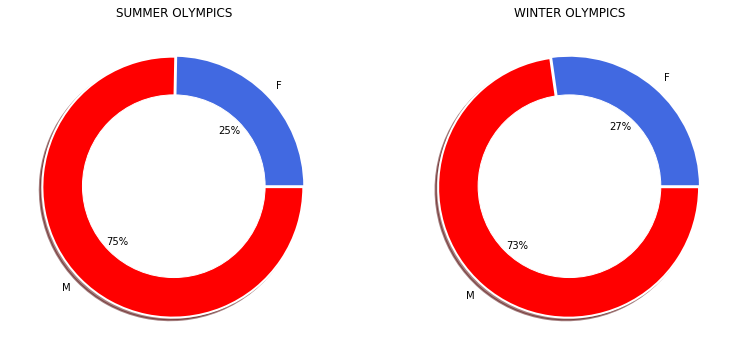

In [0]:
plt.figure(figsize=(13,6))
plt.subplot(121)
summer.groupby("Sex")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["royalblue","red"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("SUMMER OLYMPICS")

plt.subplot(122)
winter.groupby("Sex")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["royalblue","red"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("WINTER OLYMPICS")

plt.show()


### Nations with highest participation in olympics


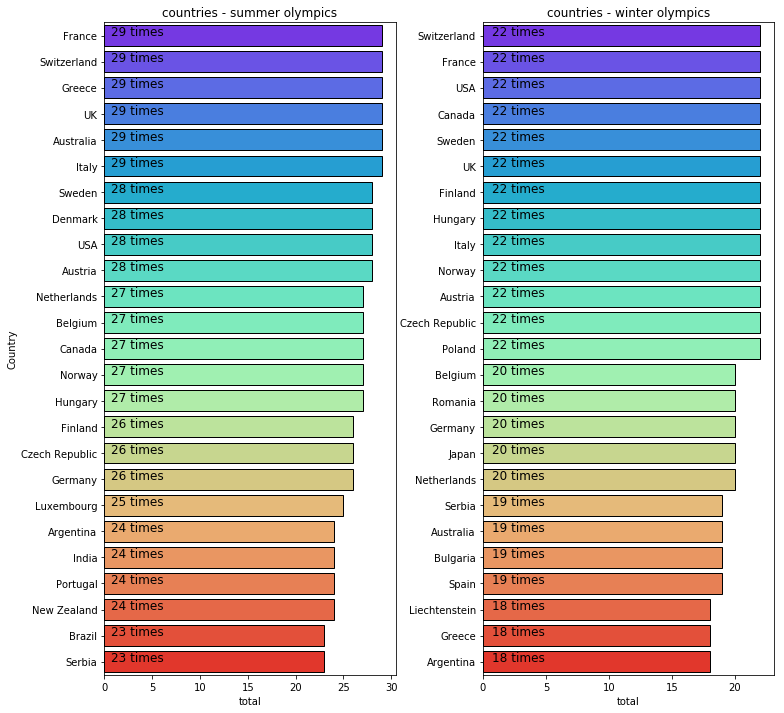

In [0]:
yr_cn = pd.crosstab(summer["Country"],summer["Year"]).reset_index()
cols = yr_cn.columns[1:]

for i in cols:
    yr_cn[i] = np.where(yr_cn[i] > 0 ,1,0)
    
yr_cn["total"] = yr_cn[cols].sum(axis = 1)
yr_cn = yr_cn.sort_values(by = "total",ascending=False)


plt.figure(figsize=(12,12))
plt.subplot(121)
ax = sns.barplot("total","Country",data=yr_cn[:25],
                 linewidth = 1,edgecolor = "k"*25,
                 palette = "rainbow"
                )

for i,j in enumerate(yr_cn["total"][:25].astype(str) + " times"):
    ax.text(.7,i,j,fontsize = 12)
    
plt.title("countries - summer olympics")

##
yr_cn1 = pd.crosstab(winter["Country"],winter["Year"]).reset_index()
cols = yr_cn1.columns[1:]

for i in cols:
    yr_cn1[i] = np.where(yr_cn1[i] > 0 ,1,0)
    
yr_cn1["total"] = yr_cn1[cols].sum(axis = 1)
yr_cn1 = yr_cn1.sort_values(by = "total",ascending=False)



plt.subplot(122)
ax = sns.barplot("total","Country",data=yr_cn1[:25],
                 linewidth = 1,edgecolor = "k"*25,
                 palette = "rainbow"
                )

for i,j in enumerate(yr_cn1["total"][:25].astype(str) + " times"):
    ax.text(.7,i,j,fontsize = 12)
    
plt.title("countries - winter olympics")
plt.ylabel("")
plt.subplots_adjust(wspace = .3)
plt.show()

In [0]:
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### Participation of countries

In [0]:
tmp = data_merge.groupby(['Year', 'City'])['Season'].value_counts()
df = pd.DataFrame(data={'Athletes': tmp.values}, index=tmp.index).reset_index()


In [0]:
tmp = data_merge.groupby(['Country'])['Year'].nunique()
df = pd.DataFrame(data={'Editions': tmp.values}, index=tmp.index).reset_index()
df.head()

,Country,Editions
0,Afghanistan,14
1,Albania,11
2,Algeria,15
3,American Samoa,9
4,Andorra,17


In [0]:
trace = go.Choropleth(
            locations = df['Country'],
            locationmode='country names',
            z = df['Editions'],
            text = df['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Editions',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Olympic countries',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

###  Let's show separately the number of events per country for Summer and Winter events. We will extract a function first

In [0]:
tmp = data_merge.groupby(['Country', 'Season'])['Year'].nunique()
df = pd.DataFrame(data={'Editions': tmp.values}, index=tmp.index).reset_index()
df.head(2)

,Country,Season,Editions
0,Afghanistan,Summer,14
1,Albania,Summer,8


In [0]:
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

def draw_map(dataset, title, colorscale, reversescale=False):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode='country names',
                z = dataset['Editions'],
                text = dataset['Country'],
                autocolorscale =False,
                reversescale = reversescale,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Editions',
                    tickprefix = '')
            )

    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'orthographic'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)
    
draw_map(dfS, 'Olympic countries (Summer games)', "Reds")

In [0]:








draw_map(dfW, 'Olympic countries (Winter games)', "Blues", True)


## EDA on parameters:

   ### Distribution of Height & Weight of Athletes

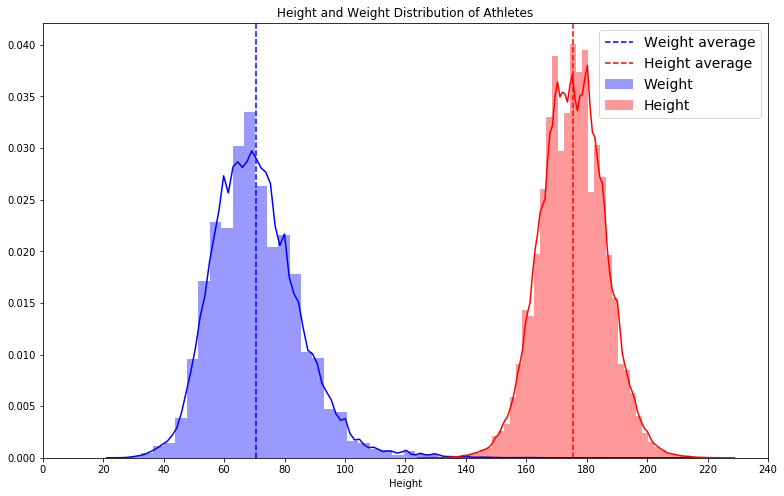

In [0]:
cols = ["Weight","Height"]
length = len(cols)
cs = ["b","r"]

plt.figure(figsize= (13,8))

for i,j,k in itertools.zip_longest(cols,range(length),cs) :
    sns.distplot(data_merge[data_merge[i].notnull()][i],color = k,label = i)
    plt.axvline(data_merge[data_merge[i].notnull()][i].mean(),
                color = k,linestyle = "dashed",label = i+ " average")
    plt.legend(loc = "best",prop = {"size" : 14})
    plt.title("Height and Weight Distribution of Athletes")
    plt.subplots_adjust(hspace = .2)
    plt.xticks(np.arange(0,250,20))

### Body mass index of Athletes  (not used for prediction):<br>
The body mass index (BMI) or Quetelet index is a value derived from the mass (weight) and height of an individual<br>The BMI is an attempt to quantify the amount of tissue mass (muscle, fat, and bone) in an individual .<br> The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres.. A body mass index between 18.5 and 24.9 falls in the healthy range.

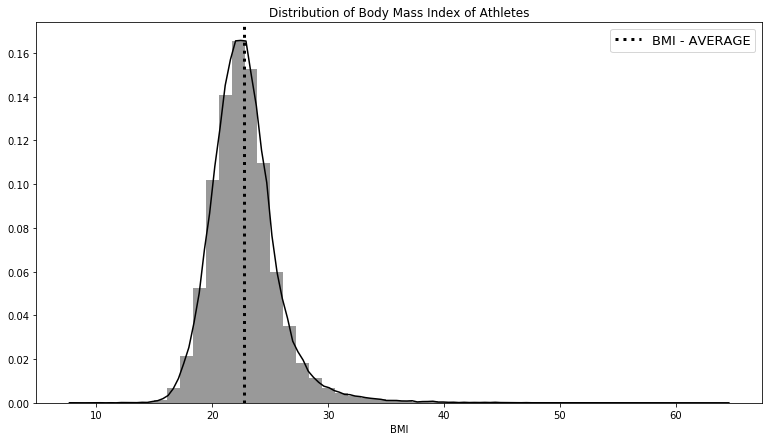

In [0]:
#Selecting non null values of height and weight
metric_data = data_merge[(data_merge["Height"].notnull()) & (data_merge["Weight"].notnull())]
#convert height to meters
metric_data["Height_in_mt"] = metric_data["Height"]/100
#caluculate BMI
metric_data["BMI"] = metric_data["Weight"]/(metric_data["Height_in_mt"]**2)

plt.figure(figsize=(13,7))
sns.distplot(metric_data["BMI"],color = "k")
plt.axvline(metric_data["BMI"].mean(),
            linestyle = "dotted",linewidth = 3,
            color= "k",label = "BMI - AVERAGE")
plt.legend(loc = "best",prop = {"size" : 13})
plt.title("Distribution of Body Mass Index of Athletes")
plt.show()

In [0]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#from bubbly.bubbly import bubbleplot 
#from __future__ import division
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



### Let's show the variation in time of the number of athletes per each country.



In [0]:
tmp = data_merge.groupby(['Year','Sport'])['Country'].value_counts()
dataset = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
dataset.head()

,Year,Sport,Country,Athlets
0,1896,Athletics,Greece,36
1,1896,Athletics,USA,21
2,1896,Athletics,Germany,14
3,1896,Athletics,France,12
4,1896,Athletics,UK,7


### Let's show the age, height and weight of athletes distribution using a distplot chart.

### We will group the data per sex and Sport

create_distplot

Let's show first the height distribution for athelets, grouped by sex.

In [0]:
female_h = data_merge[data_merge['Sex']=='F']['Height'].dropna()
male_h = data_merge[data_merge['Sex']=='M']['Height'].dropna()

hist_data = [female_h, male_h]
group_labels = ['Female Height', 'Male Height']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Atheletes Height distribution plot')
iplot(fig, filename='dist_only')

Let's show the weight distribution for athelets, grouped by sex.



In [0]:
female_w = data_merge[data_merge['Sex']=='F']['Weight'].dropna()
male_w = data_merge[data_merge['Sex']=='M']['Weight'].dropna()

hist_data = [female_w, male_w]
group_labels = ['Female Weight', 'Male Weight']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Atheletes Weight distribution plot')
iplot(fig, filename='dist_only')

Let's show also the age distribution for athelets, grouped by sex.



In [0]:
female_a = data_merge[data_merge['Sex']=='F']['Age'].dropna()
male_a = data_merge[data_merge['Sex']=='M']['Age'].dropna()

hist_data = [female_a, male_a]
group_labels = ['Female Age', 'Male Age']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Atheletes Age distribution plot')
iplot(fig, filename='dist_only')

Let's show on a graph with x axis the average height and with y axis the average weight the number of athletes, grouped by sport.

We will use a scatter plot but with markers (for each sport) proportional with the number of athletes.

In [0]:
tmp = data_merge.groupby(['Sport'])['Height', 'Weight'].agg('mean').dropna()
df1 = pd.DataFrame(tmp).reset_index()
tmp2 = data_merge.groupby(['Sport'])['ID'].count()
df2 = pd.DataFrame(tmp2).reset_index()
dataset = df1.merge(df2)

    Let's define the hover text.



In [0]:
hover_text = []
for index, row in dataset.iterrows():
    hover_text.append(('Sport: {}<br>'+
                      'Number of athlets: {}<br>'+
                      'Mean Height: {}<br>'+
                      'Mean Weight: {}<br>').format(row['Sport'],
                                            row['ID'],
                                            round(row['Height'],2),
                                            round(row['Weight'],2)))
dataset['hover_text'] = hover_text

Let's now create the bubble scatter plot.



In [0]:
data = []
for sport in dataset['Sport']:
    ds = dataset[dataset['Sport']==sport]
    trace = go.Scatter(
        x = ds['Height'],
        y = ds['Weight'],
        name = sport,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=10,
            size=ds['ID'],
            line=dict(
                width=2
            ),),
        text = ds['hover_text']
    )
    data.append(trace)
                         
layout = go.Layout(
    title='Athletes height and weight mean - grouped by sport',
    xaxis=dict(
        title='Height [cm]',
        gridcolor='rgb(128, 128, 128)',
        zerolinewidth=1,
        ticklen=1,
        gridwidth=0.5,
    ),
    yaxis=dict(
        title='Weight [kg]',
        gridcolor='rgb(128, 128, 128)',
        zerolinewidth=1,
        ticklen=1,
        gridwidth=0.5,
    ),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(254, 254, 254)',
    showlegend=False,
)


fig = dict(data = data, layout = layout)

iplot(fig, filename='athlets_body_measures')
                         

KeyError: 'Height'

### Athelets body measurements grouped by Gender
#### Let's do, as an exercise, a similar plot, grouping the athletes by Gender instead of Sport

In [0]:
tmp = data_merge.groupby(['Sex'])['Height', 'Weight'].agg('mean').dropna()
df1 = pd.DataFrame(tmp).reset_index()
tmp2 = data_merge.groupby(['Sex'])['ID'].count()
df2 = pd.DataFrame(tmp2).reset_index()
dataset = df1.merge(df2)

In [0]:
hover_text = []
for index, row in dataset.iterrows():
    hover_text.append(('Sex: {}<br>'+
                      'Number of athlets: {}<br>'+
                      'Mean Height: {}<br>'+
                      'Mean Weight: {}<br>').format(row['Sex'],
                                            row['ID'],
                                            round(row['Height'],2),
                                            round(row['Weight'],2)))
dataset['hover_text'] = hover_text

In [0]:
data = []
for sex in dataset['Sex']:
    ds = dataset[dataset['Sex']==sex]
    trace = go.Scatter(
        x = ds['Height'],
        y = ds['Weight'],
        name = sex,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=10,
            size=ds['ID'],
            line=dict(
                width=2
            ),),
        text = ds['hover_text']
    )
    data.append(trace)
                         
layout = go.Layout(
    title='Athlets height and weight mean - grouped by Sex',
    xaxis=dict(
        title='Height [cm]',
        gridcolor='rgb(128, 128, 128)',
        zerolinewidth=1,
        ticklen=1,
        gridwidth=0.5,
    ),
    yaxis=dict(
        title='Weight [kg]',
        gridcolor='rgb(128, 128, 128)',
        zerolinewidth=1,
        ticklen=1,
        gridwidth=0.5,
    ),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(254, 254, 254)',
    showlegend=False,
)


fig = dict(data = data, layout = layout)

iplot(fig, filename='athlets_body_measures2')
                         

### Time variation of athlets body measurement, grouped by Gender .

In [0]:
tmp = data_merge.groupby(['Sex', 'Year'])['Height', 'Weight'].agg('mean').dropna()
df1 = pd.DataFrame(tmp).reset_index()
tmp2 =data_merge.groupby(['Sex', 'Year'])['ID'].count()
df2 = pd.DataFrame(tmp2).reset_index()
dataset = df1.merge(df2)

In [0]:
hover_text = []
for index, row in dataset.iterrows():
    hover_text.append(('Year: {}<br>'+
                       'Sex: {}<br>'+
                      'Number of athlets: {}<br>'+
                      'Mean Height: {}<br>'+
                      'Mean Weight: {}<br>').format(row['Year'], 
                                            row['Sex'],
                                            row['ID'],
                                            round(row['Height'],2),
                                            round(row['Weight'],2)))
dataset['hover_text'] = hover_text

In [0]:
years = (data_merge.groupby(['Year'])['Year'].nunique()).index
sexes = (data_merge.groupby(['Sex'])['Sex'].nunique()).index
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [100, 200], 'title': 'Height'}
figure['layout']['yaxis'] = {'range': [20, 200],'title': 'Weight'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['showlegend'] = False
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1896',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}
# make data
year = 1896
for sex in sexes:
    dataset_by_year = dataset[dataset['Year'] == year]
    dataset_by_year_and_season = dataset_by_year[dataset_by_year['Sex'] == sex]

    data_dict = {
        'x': list(dataset_by_year_and_season['Height']),
        'y': list(dataset_by_year_and_season['Weight']),
        'mode': 'markers',
        'text': list(dataset_by_year_and_season['hover_text']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 1,
            'size': list(dataset_by_year_and_season['ID'])
        },
        'name': sex
    }
    figure['data'].append(data_dict)
# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for sex in sexes:
        dataset_by_year = dataset[dataset['Year'] == int(year)]
        dataset_by_year_and_season = dataset_by_year[dataset_by_year['Sex'] == sex]

        data_dict = {
            'x': list(dataset_by_year_and_season['Height']),
            'y': list(dataset_by_year_and_season['Weight']),
            'mode': 'markers',
            'text': list(dataset_by_year_and_season['hover_text']),
            'marker': {
                'sizemode': 'area',
                'sizeref': 1,
                'size':  list(dataset_by_year_and_season['ID'])
            },
            'name': sex
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)
figure['layout']['sliders'] = [sliders_dict]
iplot(figure)

##  Sucessfull Athletes

In [0]:
med = pd.crosstab(data_merge["Name"],data_merge["Medal"]).reset_index()
med["Total"] = med['Gold'] + med['Silver'] + med['Bronze']
med_tp = med.sort_values(by = ["Total","Gold", 'Silver', 'Bronze'],ascending =False)[:100]

#Merge country
cou_lst = med_tp["Name"].tolist()
cou_lst = data_merge[data_merge["Name"].isin(cou_lst)][["Name","Country"]]
cou_lst = cou_lst.drop_duplicates(subset=["Name","Country"])
med_tp  = med_tp.merge(cou_lst,left_on="Name",
                       right_on="Name",how = "left").drop_duplicates("Name")


t = go.Table(header=dict(values = ['Name','Gold', 'Silver', 'Bronze','Total',"Country"],
                         line = dict(color = 'black'),
                         align = ['left','center'],
                         fill  = dict(color = [ "#66CCFF","Gold","Silver",
                                               "#CC6633","royalblue","#CCFF66"]),
                         font = dict(color = 'black', size = 14)
                        ),
             cells  = dict(values = [med_tp.Name,med_tp.Gold,med_tp.Silver,
                                     med_tp.Bronze,med_tp.Total,med_tp.Country],
                           line = dict(color = '#506784'),
                           align = ['left','center'],
                           fill  = dict(color = "#F5F8FF"),
                          )
            )
data = [t]

layout = go.Layout(dict(title = "Top 100 athletes with highest total medals.(Summer and winter olympics)"))

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#top 10

def plot(dataframe,title):
    
    trace = go.Bar(y = dataframe["Name"],
                   x = dataframe["Gold"],
                   orientation="h",
                   marker = dict(color = "Gold",
                                 line  = dict(width = 1)
                                ),
                   name = "GOLD"
                  )
    trace1 = go.Bar(y = dataframe["Name"],
                   x = dataframe["Silver"],
                   orientation="h",
                   marker = dict(color = "Silver",
                                 line  = dict(width = 1)
                                ),
                    name = "SILVER"
                  )
    trace2 = go.Bar(y = dataframe["Name"],
                   x = dataframe["Bronze"],
                   orientation="h",
                   marker = dict(color = "#CC6633",
                                 line  = dict(width = 1)
                                ),
                    name  = "BRONZE"
                  )
    
    
    dat = [trace,trace1,trace2]
    
    lay = go.Layout(dict(title= title,
                         margin = dict(r = 100,l =300),
                         xaxis  = dict(showgrid = True),
                         yaxis  = dict(showgrid = True),
                         plot_bgcolor = "white",
                         height = 650
                        )
                   )
    
    figure = go.Figure(data=dat,layout=lay)
    py.iplot(figure)

plot(med_tp[:10].sort_values(by = ["Total","Gold", 'Silver', 'Bronze'],ascending = True),
     "Top 10 Athletes with highest medals overall(summer and winter olympics)")

# Exploratory analysis on most popular sport in Summer/Winter

## Summer

Most popular sport (Summer): Athletics

In [0]:
athletics = summer[summer.Sport=='Athletics']
athletics.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,DNW,Netherlands
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,DNW,Netherlands
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,DNW,Finland
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,DNW,Estonia
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,DNW,Norway
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",DNW,France
130,47,Erling Rudolf Aastad,M,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 4 x 100 metres Relay,DNW,Norway
131,47,Erling Rudolf Aastad,M,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's Long Jump,DNW,Norway
132,47,Erling Rudolf Aastad,M,26.0,177.0,74.0,Norway,NOR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Long Jump,DNW,Norway
133,47,Erling Rudolf Aastad,M,30.0,177.0,74.0,Norway,NOR,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Long Jump,DNW,Norway







### We realise that athletics has a wide range of events. Looking at the events, we realise that athletics comprises of many different events which requires different set of skills. An example would be Shot Put which requires explosive strength, and marathon, which requires stamina.

Let us do some exploratory analysis on these 2 data sets

### Shot Put

In [0]:

shotput = athletics[athletics.Event=="Athletics Men's Shot Put"]
shotput.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,DNW,Finland
984,554,Benik Abramyan,M,31.0,186.0,115.0,Georgia,GEO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Shot Put,DNW,Georgia
1216,684,Ahmed Mohamed Achouche,M,28.0,191.0,110.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Shot Put,DNW,Egypt
1217,684,Ahmed Mohamed Achouche,M,32.0,191.0,110.0,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Shot Put,DNW,Egypt
2308,1284,Jess Aguirre Delgado,M,NaN,175.0,NaN,Mexico,MEX,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Shot Put,DNW,Mexico
2309,1284,Jess Aguirre Delgado,M,NaN,175.0,NaN,Mexico,MEX,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Shot Put,DNW,Mexico
2417,1355,"Henrik Aleksander ""Heikki"" hlman (-Pennola)",M,26.0,NaN,NaN,Finland,FIN,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's Shot Put,DNW,Finland
2536,1428,Paavo Aho,M,20.0,180.0,63.0,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Shot Put,DNW,Finland
3038,1695,Lahcen Samsam Akka,M,22.0,195.0,120.0,Morocco,MAR,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's Shot Put,DNW,Morocco
3039,1695,Lahcen Samsam Akka,M,30.0,195.0,120.0,Morocco,MAR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's Shot Put,DNW,Morocco


As we can see, there are many NAN fields in the height and weight column. Lets get rid of it by replacing them with the median of the data set.

In [0]:
spHeight = pd.DataFrame(shotput['Height']) # Response
spWeight = pd.DataFrame(shotput['Weight']) # Predictor
medSpHeight = spHeight.median()
medSpWeight = spWeight.median()

print(medSpHeight)
print(medSpWeight)

shotput['Height'].fillna(medSpHeight[0],inplace=True )
shotput['Weight'].fillna(medSpWeight[0],inplace=True )
shotput.head(50)

Height    190.0
dtype: float64
Weight    118.0
dtype: float64


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,DNW,Finland
984,554,Benik Abramyan,M,31.0,186.0,115.0,Georgia,GEO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Shot Put,DNW,Georgia
1216,684,Ahmed Mohamed Achouche,M,28.0,191.0,110.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Shot Put,DNW,Egypt
1217,684,Ahmed Mohamed Achouche,M,32.0,191.0,110.0,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Shot Put,DNW,Egypt
2308,1284,Jess Aguirre Delgado,M,NaN,175.0,118.0,Mexico,MEX,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Shot Put,DNW,Mexico
2309,1284,Jess Aguirre Delgado,M,NaN,175.0,118.0,Mexico,MEX,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Shot Put,DNW,Mexico
2417,1355,"Henrik Aleksander ""Heikki"" hlman (-Pennola)",M,26.0,190.0,118.0,Finland,FIN,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's Shot Put,DNW,Finland
2536,1428,Paavo Aho,M,20.0,180.0,63.0,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Shot Put,DNW,Finland
3038,1695,Lahcen Samsam Akka,M,22.0,195.0,120.0,Morocco,MAR,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's Shot Put,DNW,Morocco
3039,1695,Lahcen Samsam Akka,M,30.0,195.0,120.0,Morocco,MAR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's Shot Put,DNW,Morocco


Now that the dataset is clean, let us do some exploratory analysis on it.

Text(0.5, 1.0, 'variation of height for shotput over time')

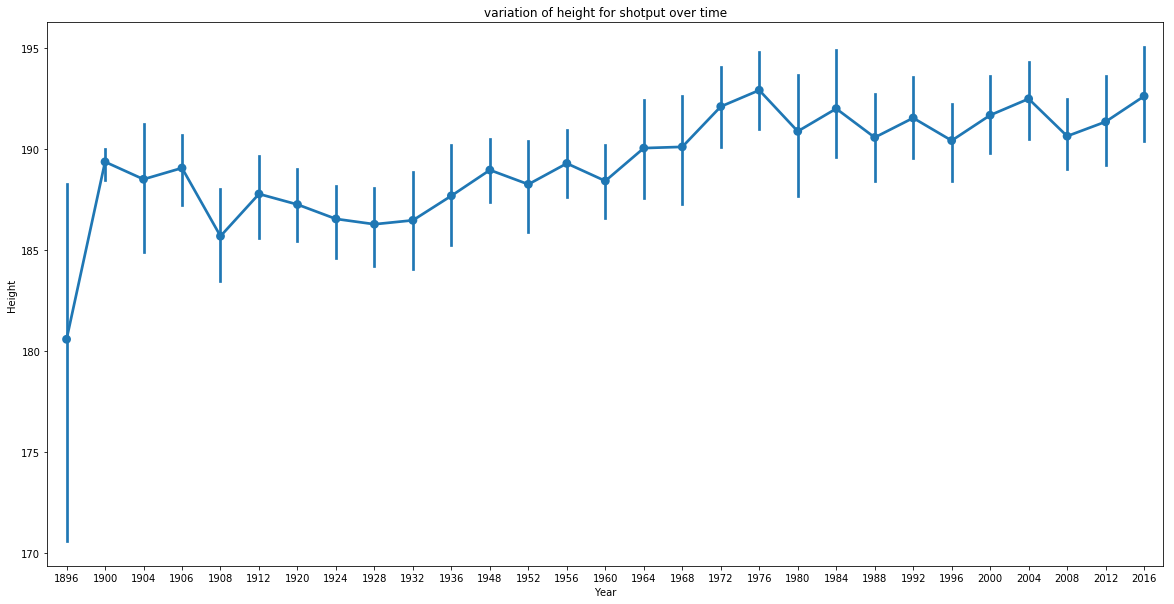

In [0]:
plt.figure(figsize=(20,10))
sns.pointplot('Year', 'Height', data = shotput)
plt.title('variation of height for shotput over time')

Text(0.5, 1.0, 'variation of weight for shotput over time')

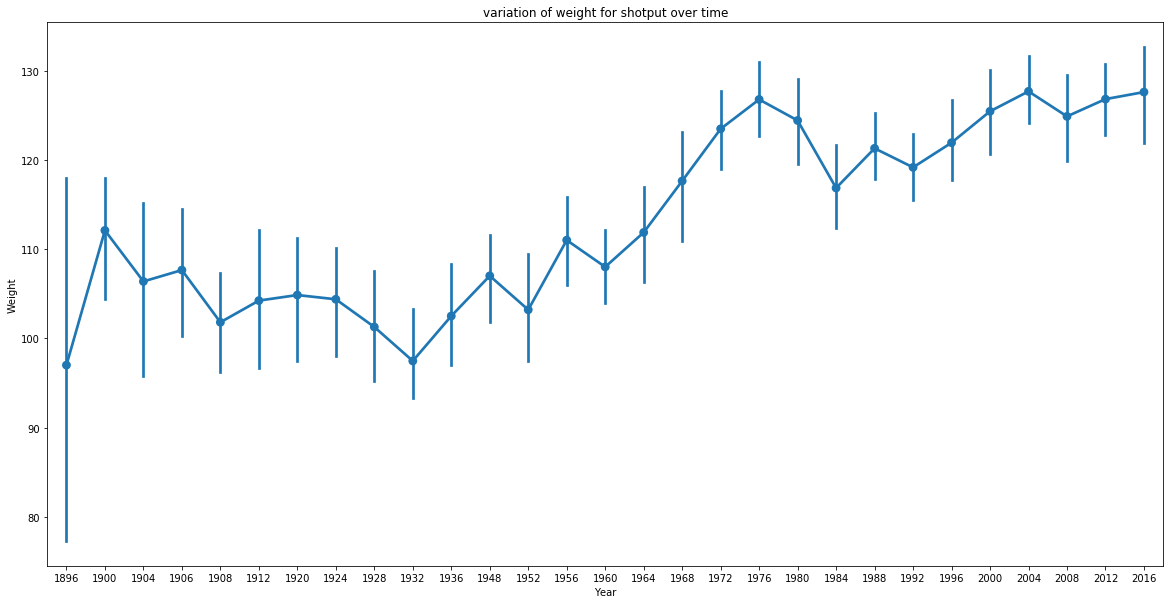

In [0]:
plt.figure(figsize=(20,10))
sns.pointplot('Year', 'Weight', data = shotput)
plt.title('variation of weight for shotput over time')

As we can see from the graphs, we can see that from the year 1932, the shotputters are slowlygetting taller, as well as heavier. This may be due to a more stringent and specialised selection process for the athletes joining the olympics as the competition increases.

---

#### Now Let's see if we are able to predict weight using height using a linear regression model.

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **Weight**     
Predictor Feature : **Height**    

> Regression Model : Weight = $a$ $\times$ Height + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

In [0]:
spWeight = pd.DataFrame(shotput['Weight']) # Response
spHeight = pd.DataFrame(shotput['Height']) # Predictor

In [0]:

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
spHeight_train, spHeight_test, spWeight_train, spWeight_test = train_test_split(spHeight, spWeight, test_size = 0.1)

# Check the sample sizes
print("Train Set :", spHeight_train.shape, spWeight_train.shape)
print("Test Set  :", spHeight_test.shape, spWeight_test.shape)

Train Set : (615, 1) (615, 1)
Test Set  : (69, 1) (69, 1)


Let us perform some Basic Exploration and visualisation on the train set.

In [0]:
spHeight_train.describe()

,Height
count,615.000000
mean,189.842276
std,6.094492
min,159.000000
25%,186.000000
50%,190.000000
75%,193.000000
max,208.000000


In [0]:
spWeight_train.describe()

,Weight
count,615.000000
mean,115.965041
std,17.111557
min,56.000000
25%,106.000000
50%,118.000000
75%,125.000000
max,165.000000


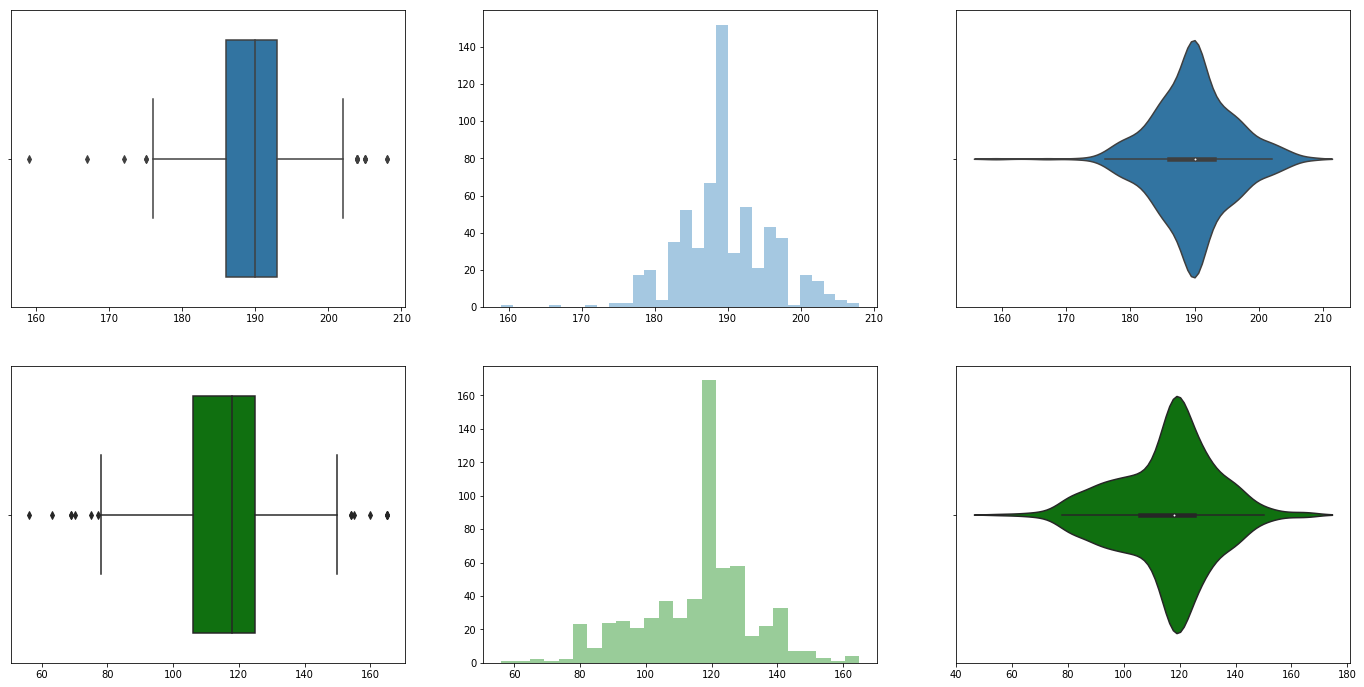

In [0]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for spHeight_train
sns.boxplot(spHeight_train, orient = "h", ax = axes[0,0])
sns.distplot(spHeight_train, kde = False, ax = axes[0,1])
sns.violinplot(spHeight_train, ax = axes[0,2])

# Plot the basic uni-variate figures for spWeight_train
sns.boxplot(spWeight_train, orient = "h", ax = axes[1,0], color = 'g')
sns.distplot(spWeight_train, kde = False, ax = axes[1,1], color = 'g')
sns.violinplot(spWeight_train, ax = axes[1,2], color = 'g')

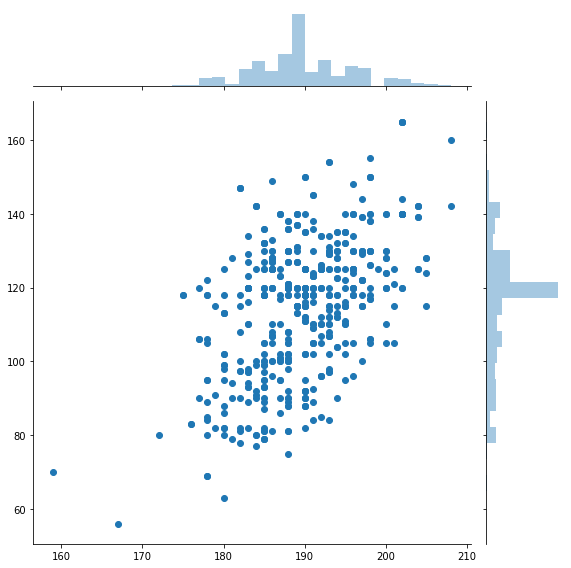

In [0]:
# Jointplot of spWeight_train against spHeight_train
sns.jointplot(spHeight_train, spWeight_train, height = 8)

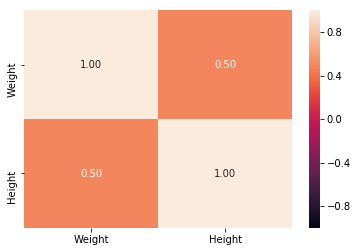

In [0]:

# Create a joint dataframe by concatenating the two variables
spJointDF = pd.concat([spWeight_train, spHeight_train], axis = 1, join_axes = [spHeight_train.index])

# Calculate the correlation between the two columns/variables
sns.heatmap(spJointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [0]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
spLinreg = LinearRegression()

In [0]:
# Train the Linear Regression model
spLinreg.fit(spHeight_train, spWeight_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The model has been *trained* to fit the following formula.

>  Regression Problem : Weight = $a$ $\times$ Height + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [0]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', spLinreg.intercept_)
print('Coefficients \t: a = ', spLinreg.coef_)

Intercept 	: b =  [-149.63207488]
Coefficients 	: a =  [[1.39904093]]


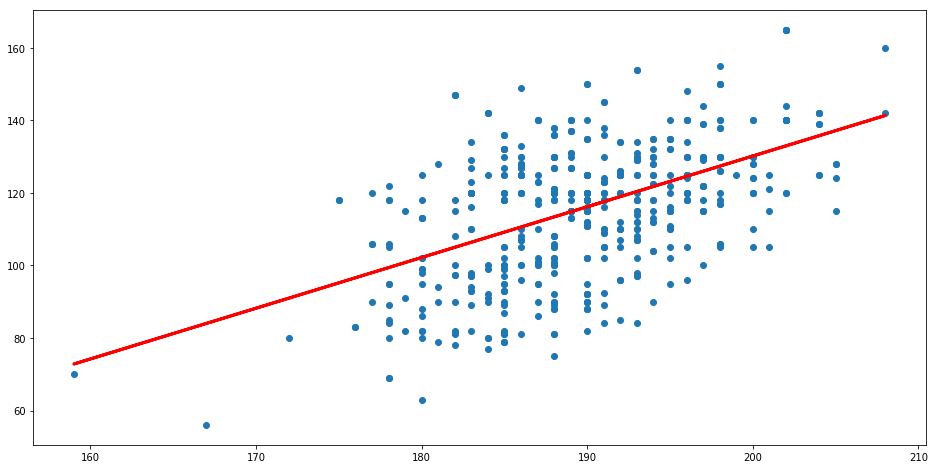

In [0]:
# Formula for the Regression line
spRegline_x = spHeight_train
spRegline_y = spLinreg.intercept_ + spLinreg.coef_ * spHeight_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(spHeight_train, spWeight_train)
plt.plot(spRegline_x, spRegline_y, 'r-', linewidth = 3)
plt.show()

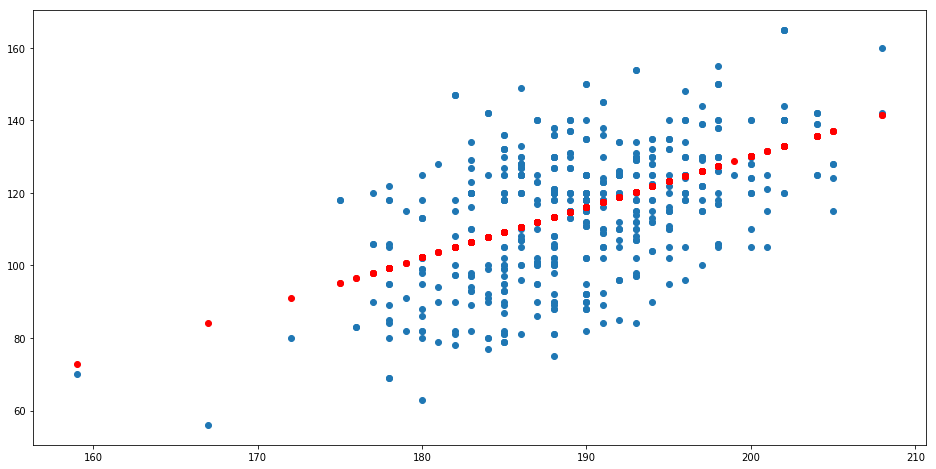

In [0]:
# Predict Total values corresponding to Height Train
sp_weight_train_pred = spLinreg.predict(spHeight_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(spHeight_train, spWeight_train)
plt.scatter(spHeight_train, sp_weight_train_pred, color = "r")
plt.show()

Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [0]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", spLinreg.score(spHeight_train, spWeight_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


spmse = mean_sq_err(spWeight_train, sp_weight_train_pred)
print("Mean Squared Error (MSE) \t:", spmse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(spmse))

Explained Variance (R^2) 	: 0.24828864226371528
Mean Squared Error (MSE) 	: 219.74722918687593
Root Mean Squared Error (RMSE) 	: 14.823873622871854


Test the Linear Regression model `linreg` using the Test Set.

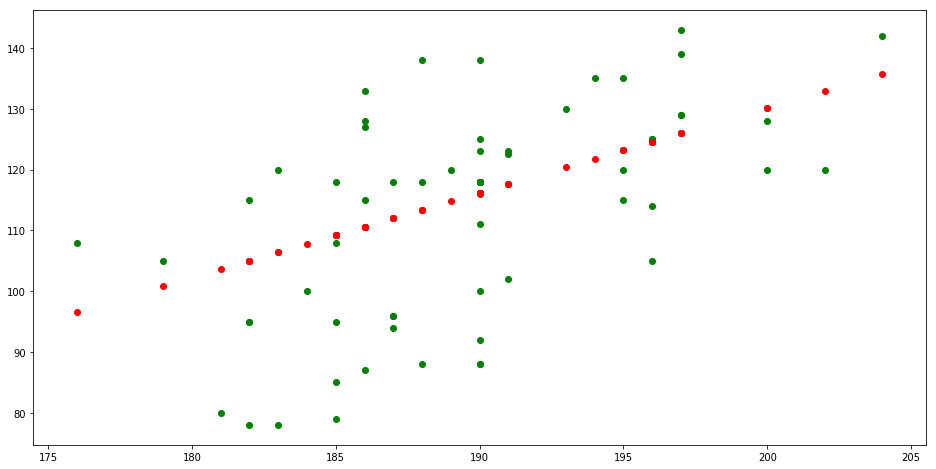

In [0]:
# Predict Weight values corresponding to Height Test
sp_weight_test_pred = spLinreg.predict(spHeight_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(spHeight_test, spWeight_test, color = "green")
plt.scatter(spHeight_test, sp_weight_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [0]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", spLinreg.score(spHeight_test, spWeight_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

spmse = mean_sq_err(spWeight_test, sp_weight_test_pred)
print("Mean Squared Error (MSE) \t:", spmse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(spmse))

Explained Variance (R^2) 	: 0.2815353910127485
Mean Squared Error (MSE) 	: 196.424994703577
Root Mean Squared Error (RMSE) 	: 14.015170163204477


### Marathon

In [0]:
marathon = athletics[athletics.Event=="Athletics Men's Marathon"]
marathon.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
312,166,Omari Abdallah,M,21.0,168.0,57.0,Tanzania,TAN,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's Marathon,DNW,Tanzania
322,175,Abdelgani Hassan Abdel Fattah,M,31.0,NaN,NaN,Egypt,EGY,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's Marathon,DNW,Egypt
458,254,Talal Omar Abdillahi,M,25.0,170.0,57.0,Djibouti,DJI,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Marathon,DNW,Djibouti
469,256,"Abdihakim ""Abdi"" Abdirahman",M,35.0,178.0,61.0,United States,USA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's Marathon,DNW,USA
516,289,Abdul Haji Abdul Latheef,M,17.0,168.0,54.0,Maldives,MDV,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,DNW,Maldives
717,408,Alfonso Abelln Lpez,M,37.0,174.0,63.0,Spain,ESP,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,DNW,Spain
720,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold,Ethiopia
721,412,Tesfaye Abera Dibaba,M,24.0,192.0,68.0,Ethiopia,ETH,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,DNW,Ethiopia
852,487,Inni Aboubacar,M,NaN,NaN,NaN,Niger,NIG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,DNW,Niger
894,511,Tadesse Abraham,M,33.0,178.0,61.0,Switzerland,SUI,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,DNW,Switzerland


As we can see, there are many NAN fields in the height and weight column. Lets get rid of it by replacing them with the median of the data set.

In [0]:
maHeight = pd.DataFrame(marathon['Height'])
maWeight = pd.DataFrame(marathon['Weight'])
medMaHeight = maHeight.median() #172
medMaWeight = maWeight.median() #60

print(medMaHeight[0])
print(medMaWeight[0])

marathon['Height'].fillna(medMaHeight[0],inplace=True )
marathon['Weight'].fillna(medMaWeight[0],inplace=True )
marathon.head(50)

172.0
60.0


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
312,166,Omari Abdallah,M,21.0,168.0,57.0,Tanzania,TAN,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's Marathon,DNW,Tanzania
322,175,Abdelgani Hassan Abdel Fattah,M,31.0,172.0,60.0,Egypt,EGY,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's Marathon,DNW,Egypt
458,254,Talal Omar Abdillahi,M,25.0,170.0,57.0,Djibouti,DJI,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Marathon,DNW,Djibouti
469,256,"Abdihakim ""Abdi"" Abdirahman",M,35.0,178.0,61.0,United States,USA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's Marathon,DNW,USA
516,289,Abdul Haji Abdul Latheef,M,17.0,168.0,54.0,Maldives,MDV,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,DNW,Maldives
717,408,Alfonso Abelln Lpez,M,37.0,174.0,63.0,Spain,ESP,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,DNW,Spain
720,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold,Ethiopia
721,412,Tesfaye Abera Dibaba,M,24.0,192.0,68.0,Ethiopia,ETH,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,DNW,Ethiopia
852,487,Inni Aboubacar,M,NaN,172.0,60.0,Niger,NIG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,DNW,Niger
894,511,Tadesse Abraham,M,33.0,178.0,61.0,Switzerland,SUI,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,DNW,Switzerland


Now that the dataset is clean, let us do some exploratory analysis on it.

Text(0.5, 1.0, 'variation of height for marathon over time')

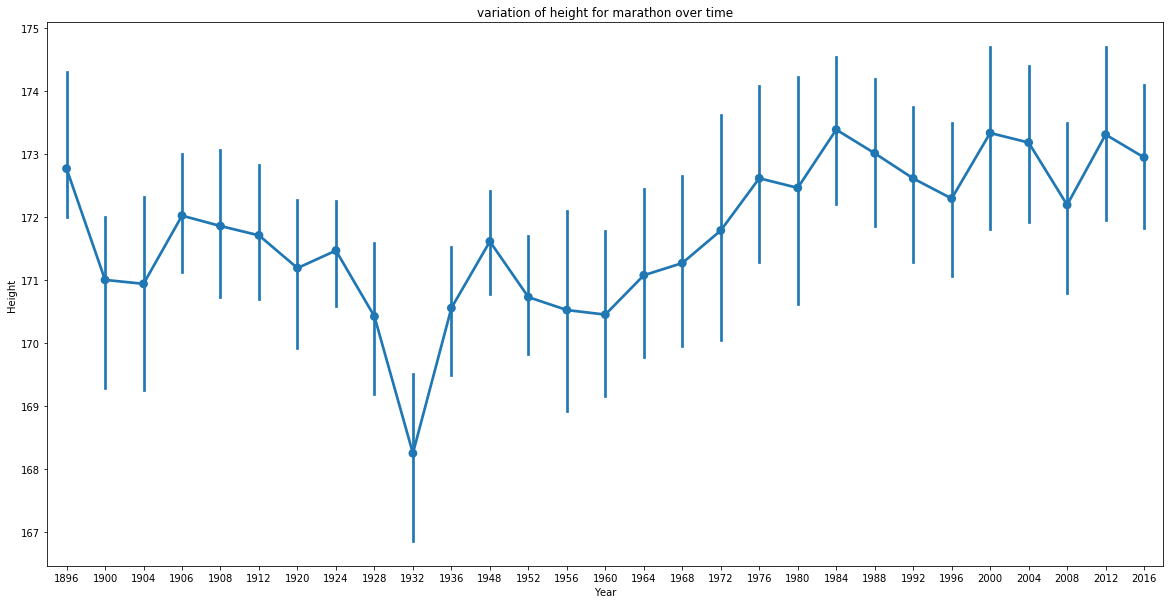

In [0]:
plt.figure(figsize=(20,10))
sns.pointplot('Year', 'Height', data = marathon)
plt.title('variation of height for marathon over time')

Text(0.5, 1.0, 'variation of weight for marathon over time')

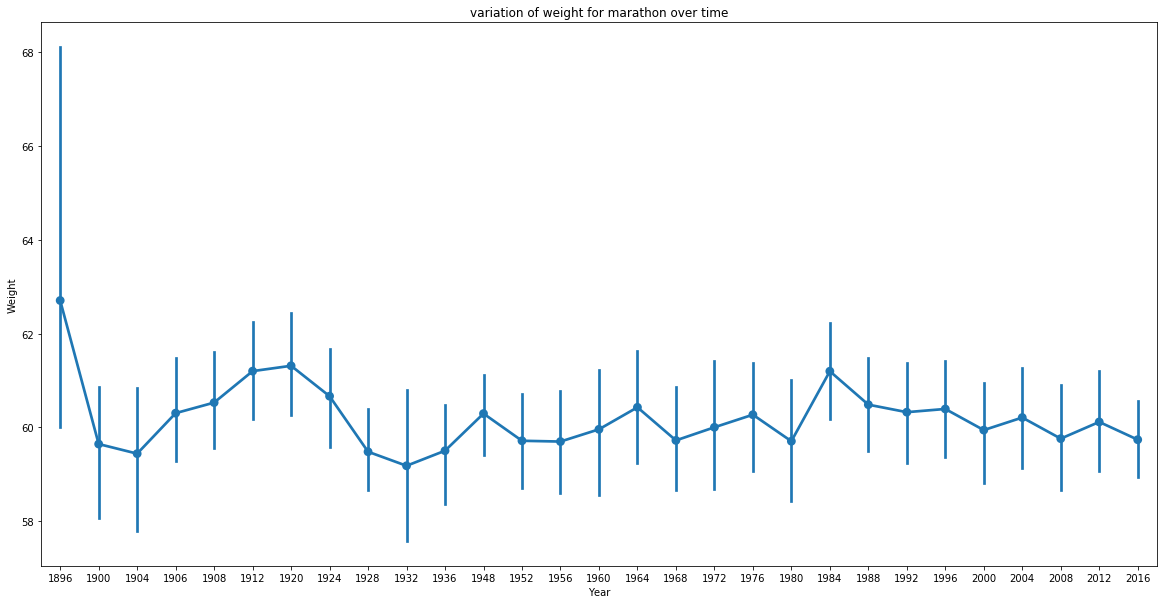

In [0]:
plt.figure(figsize=(20,10))
sns.pointplot('Year', 'Weight', data = marathon)
plt.title('variation of weight for marathon over time')

From these 2 graphs, we can see that specialised selection for Olympics marathon runners started early in the year 1900 where the weight range has remained between 58kg to 62kg, and the height has since stabilised after the year 1976, with a range of about 171 to 175 cm.

---

#### Now Let's see if we are able to predict weight using height using a linear regression model.

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **Weight**     
Predictor Feature : **Height**    

> Regression Model : Weight = $a$ $\times$ Height + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

In [0]:
maWeight = pd.DataFrame(marathon['Weight'])
maHeight = pd.DataFrame(marathon['Height'])

Set up the regression problem with Train and Test datasets.

In [0]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
maHeight_train, maHeight_test, maWeight_train, maWeight_test = train_test_split(maHeight, maWeight, test_size = 0.1)

# Check the sample sizes
print("Train Set :", maHeight_train.shape, maWeight_train.shape)
print("Test Set  :", maHeight_test.shape, maWeight_test.shape)

Train Set : (1883, 1) (1883, 1)
Test Set  : (210, 1) (210, 1)


In [0]:
maHeight_train.describe()

,Height
count,1883.000000
mean,172.163569
std,6.077328
min,148.000000
25%,169.000000
50%,172.000000
75%,175.000000
max,200.000000


In [0]:
maWeight_train.describe()

,Weight
count,1883.000000
mean,60.264206
std,5.255927
min,42.000000
25%,57.000000
50%,60.000000
75%,63.000000
max,106.000000


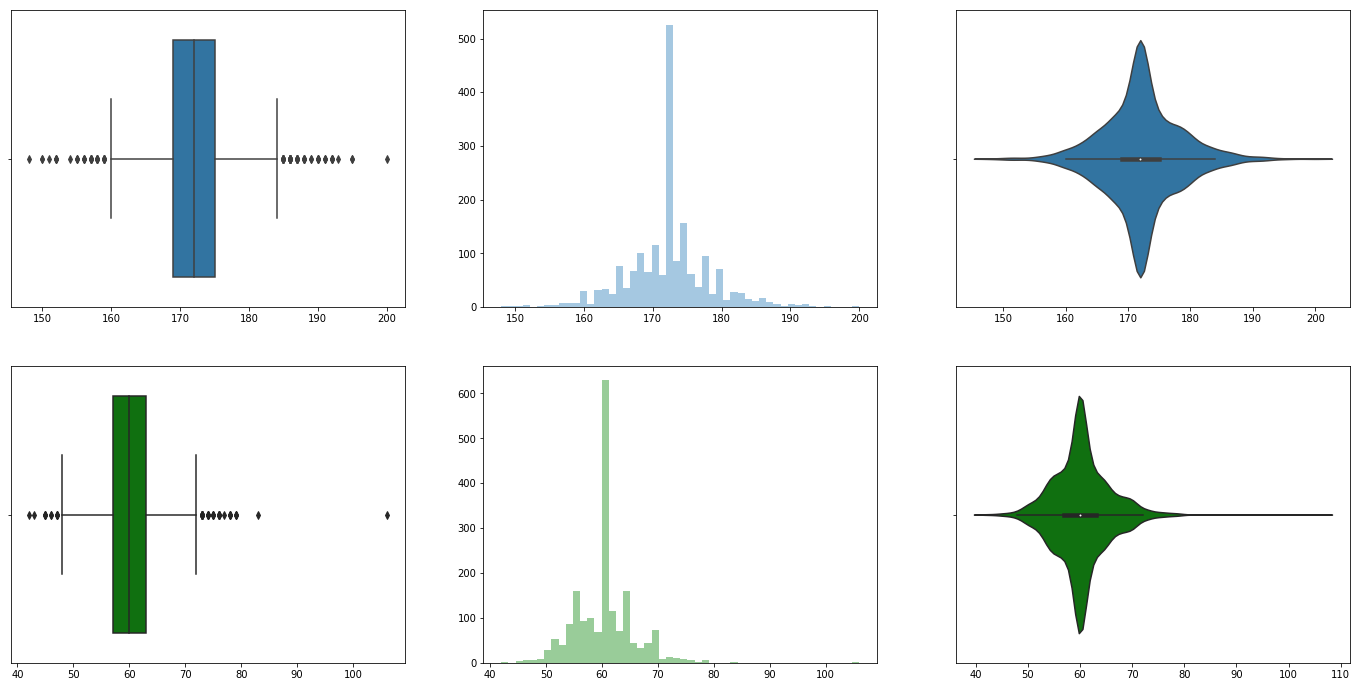

In [0]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Height Train
sns.boxplot(maHeight_train, orient = "h", ax = axes[0,0])
sns.distplot(maHeight_train, kde = False, ax = axes[0,1])
sns.violinplot(maHeight_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Weight Train
sns.boxplot(maWeight_train, orient = "h", ax = axes[1,0], color = 'g')
sns.distplot(maWeight_train, kde = False, ax = axes[1,1], color = 'g')
sns.violinplot(maWeight_train, ax = axes[1,2], color = 'g')

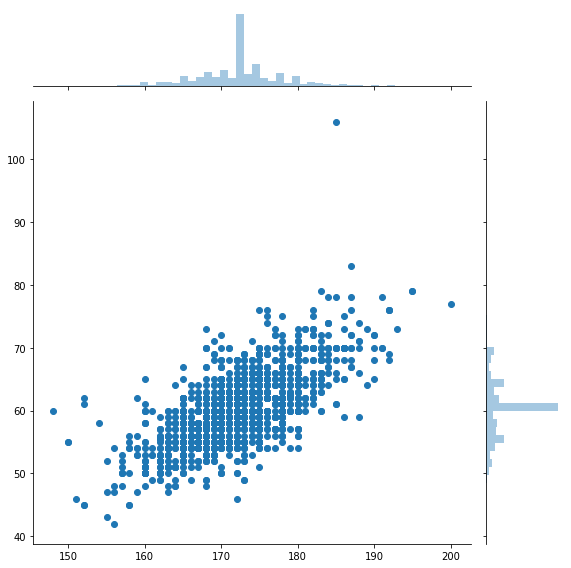

In [0]:
# Jointplot of Weight Train against Height Train
sns.jointplot(maHeight_train, maWeight_train, height = 8)

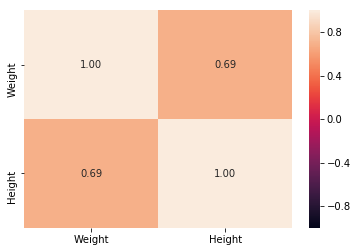

In [0]:
# Create a joint dataframe by concatenating the two variables
maJointDF = pd.concat([maWeight_train, maHeight_train], axis = 1, join_axes = [maHeight_train.index])

# Calculate the correlation between the two columns/variables
sns.heatmap(maJointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [0]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
maLinreg = LinearRegression()

In [0]:
# Train the Linear Regression model
maLinreg.fit(maHeight_train, maWeight_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The model has been *trained* to fit the following formula.

>  Regression Problem : Weight = $a$ $\times$ Height + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [0]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', maLinreg.intercept_)
print('Coefficients \t: a = ', maLinreg.coef_)

Intercept 	: b =  [-42.10723404]
Coefficients 	: a =  [[0.59461732]]


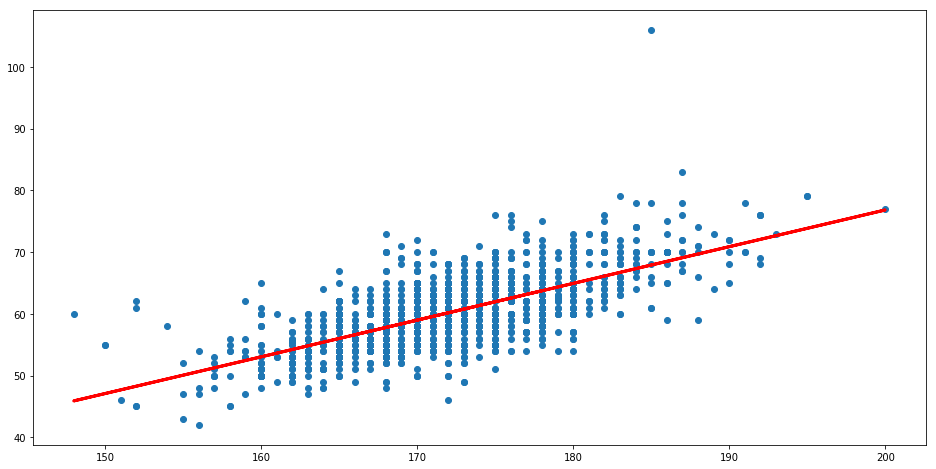

In [0]:
# Formula for the Regression line
maRegline_x = maHeight_train
maRegline_y = maLinreg.intercept_ + maLinreg.coef_ * maHeight_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(maHeight_train, maWeight_train)
plt.plot(maRegline_x, maRegline_y, 'r-', linewidth = 3)
plt.show()

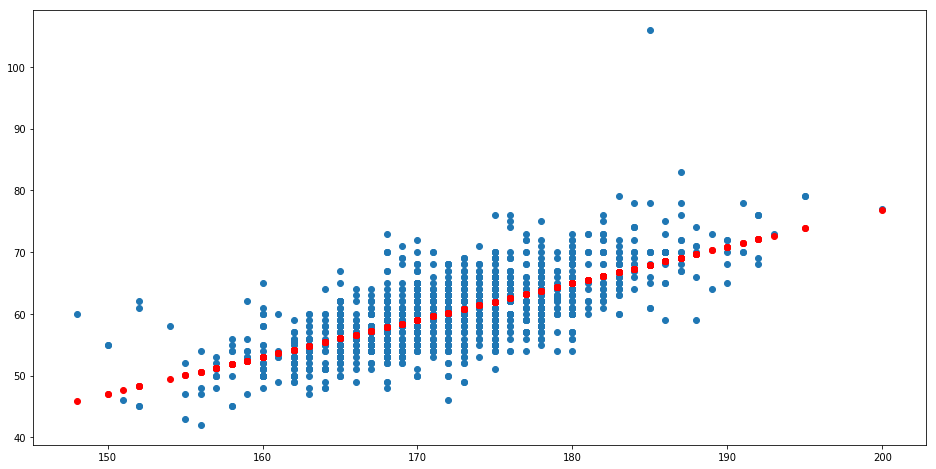

In [0]:
# Predict Total values corresponding to HP Train
ma_weight_train_pred = maLinreg.predict(maHeight_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(maHeight_train, maWeight_train)
plt.scatter(maHeight_train, ma_weight_train_pred, color = "r")
plt.show()

Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [0]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", maLinreg.score(maHeight_train, maWeight_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mamse = mean_sq_err(maWeight_train, ma_weight_train_pred)
print("Mean Squared Error (MSE) \t:", mamse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mamse))

Explained Variance (R^2) 	: 0.4727176547409579
Mean Squared Error (MSE) 	: 14.558315253247812
Root Mean Squared Error (RMSE) 	: 3.815536037472037


Test the Linear Regression model `linreg` using the Test Set.

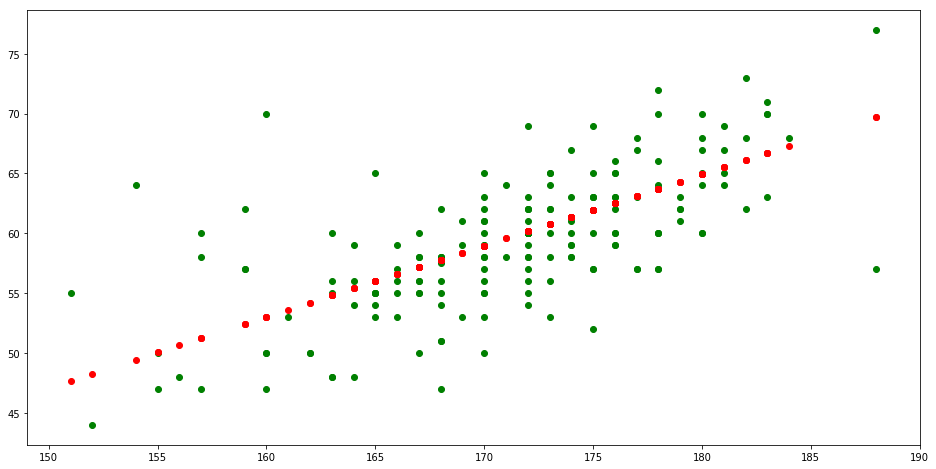

In [0]:
# Predict Total values corresponding to Height Test
ma_weight_test_pred = maLinreg.predict(maHeight_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(maHeight_test, maWeight_test, color = "green")
plt.scatter(maHeight_test, ma_weight_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [0]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", maLinreg.score(maHeight_test, maWeight_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mamse = mean_sq_err(maWeight_test, ma_weight_test_pred)
print("Mean Squared Error (MSE) \t:", mamse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mamse))

Explained Variance (R^2) 	: 0.4262583312995799
Mean Squared Error (MSE) 	: 16.160263487413992
Root Mean Squared Error (RMSE) 	: 4.019983020786778


## Winter

Most popular sport (Winter): Alpine Skiing

In [0]:
skiing = winter[winter.Sport == 'Alpine Skiing']
skiing.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
59,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Downhill,DNW,Norway
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway
62,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Slalom,DNW,Norway
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,Norway
65,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Giant Slalom,DNW,Norway
66,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Slalom,DNW,Norway
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver,Norway
68,20,Kjetil Andr Aamodt,M,26.0,176.0,85.0,Norway,NOR,1998 Winter,1998,Winter,Nagano,Alpine Skiing,Alpine Skiing Men's Downhill,DNW,Norway


Now, similar to athletics, skiing has multiple events too. However all of them are considered as stamina based sport so we will hence analyse them altogether.

### Alpine Skiing

we realise that alpine skiing has NaN values too, so let's clean that up

In [0]:

skiHeight = pd.DataFrame(skiing['Height'])
skiWeight = pd.DataFrame(skiing['Weight'])
medSkiHeight = skiHeight.median()
medSkiWeight = skiWeight.median()

print(medSkiHeight)
print(medSkiWeight)

skiing['Height'].fillna(medSkiHeight[0],inplace=True )
skiing['Weight'].fillna(medSkiWeight[0],inplace=True )
skiing.head(50)

Height    173.0
dtype: float64
Weight    71.0
dtype: float64


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
59,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Downhill,DNW,Norway
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway
62,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Slalom,DNW,Norway
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,Norway
65,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Giant Slalom,DNW,Norway
66,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Slalom,DNW,Norway
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver,Norway
68,20,Kjetil Andr Aamodt,M,26.0,176.0,85.0,Norway,NOR,1998 Winter,1998,Winter,Nagano,Alpine Skiing,Alpine Skiing Men's Downhill,DNW,Norway


Now that the dataset is clean, let us do some exploratory analysis on it.

Text(0.5, 1.0, 'variation of height for shotput over time')

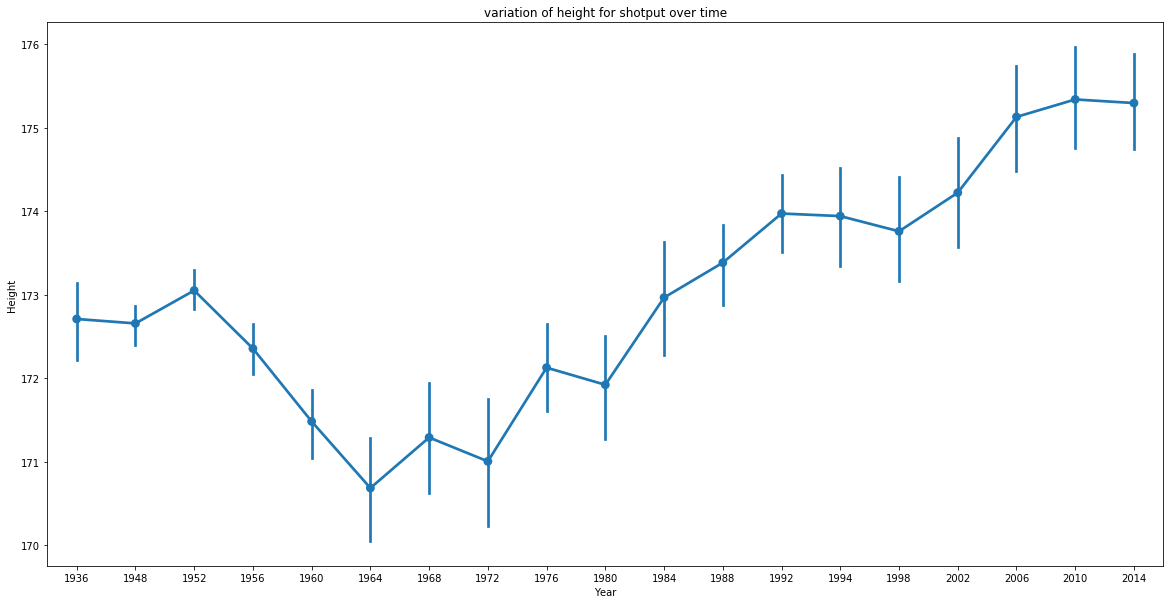

In [0]:
plt.figure(figsize=(20,10))
sns.pointplot('Year', 'Height', data = skiing)
plt.title('variation of height for shotput over time')

Text(0.5, 1.0, 'variation of height for shotput over time')

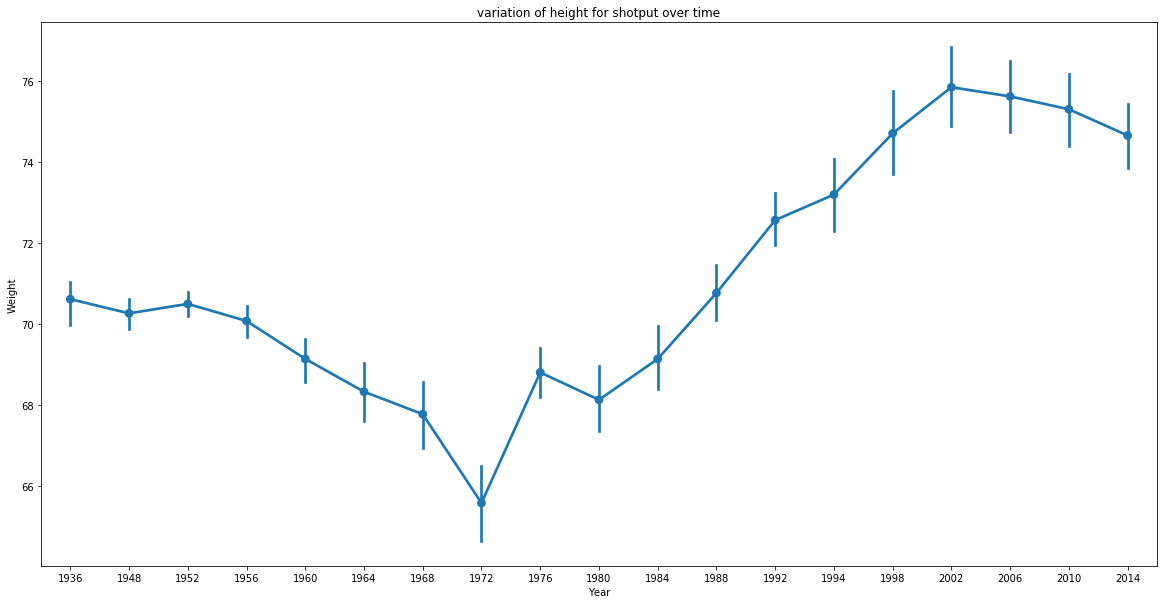

In [0]:
plt.figure(figsize=(20,10))
sns.pointplot('Year', 'Weight', data = skiing)
plt.title('variation of height for shotput over time')

From the graphs, we can see that height stabilised after year 1980, which it stayed in the range of about 173cm to 175cm. As for the weight, it showed a gradual decrease of weight from 1924 to 1998, however in 2016, the median weight per year has since started to increase back to its original value in 1924

Now Let's see if we are able to predict weight using height using a linear regression model.

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **Weight**     
Predictor Feature : **Height**    

> Regression Model : Weight = $a$ $\times$ Height + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

In [0]:
skiWeight = pd.DataFrame(skiing['Weight']) # Response
skiHeight = pd.DataFrame(skiing['Height']) # Predictor

In [0]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
skiHeight_train, skiHeight_test, skiWeight_train, skiWeight_test = train_test_split(skiHeight, skiWeight, test_size = 0.1)

# Check the sample sizes
print("Train Set :", skiHeight_train.shape, skiWeight_train.shape)
print("Test Set  :", skiHeight_test.shape, skiWeight_test.shape)

Train Set : (7946, 1) (7946, 1)
Test Set  : (883, 1) (883, 1)


In [0]:
skiHeight_train.describe()

,Height
count,7946.000000
mean,173.364334
std,6.685041
min,142.000000
25%,170.000000
50%,173.000000
75%,177.000000
max,200.000000


In [0]:
skiWeight_train.describe()

,Weight
count,7946.000000
mean,71.775170
std,9.599042
min,45.000000
25%,66.000000
50%,71.000000
75%,77.000000
max,107.000000


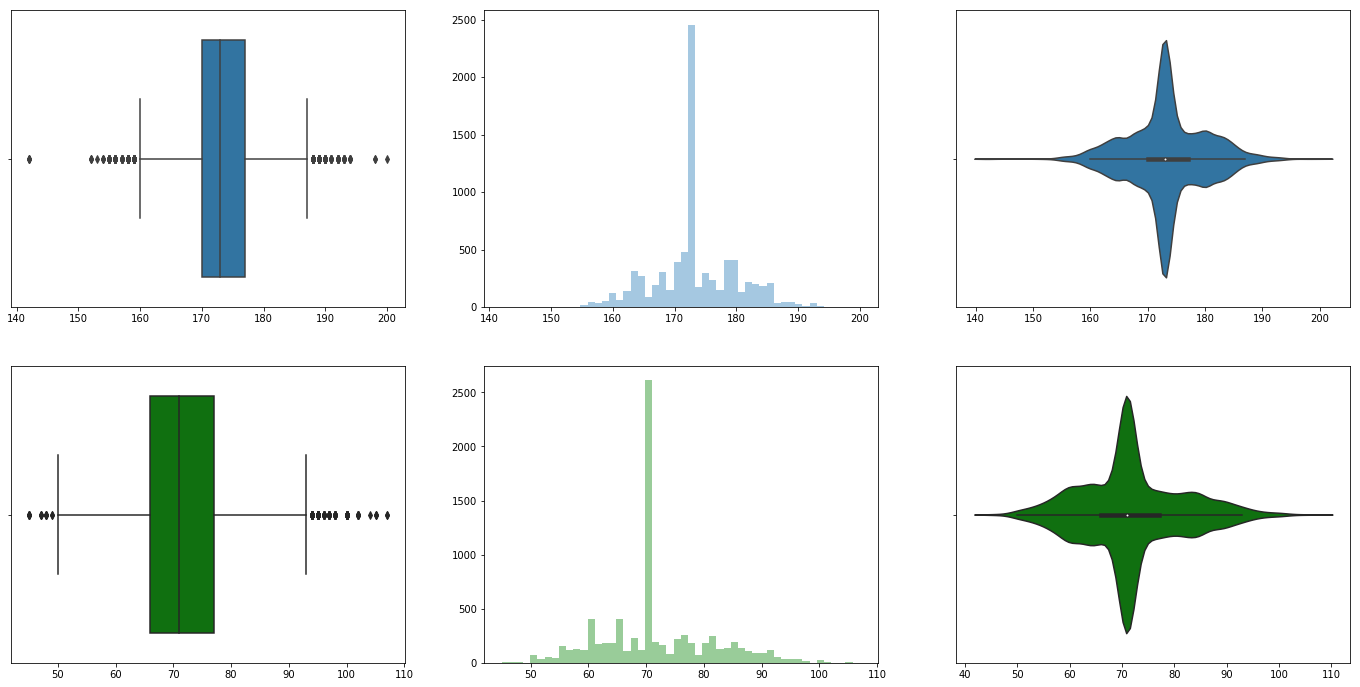

In [0]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for spHeight_train
sns.boxplot(skiHeight_train, orient = "h", ax = axes[0,0])
sns.distplot(skiHeight_train, kde = False, ax = axes[0,1])
sns.violinplot(skiHeight_train, ax = axes[0,2])

# Plot the basic uni-variate figures for spWeight_train
sns.boxplot(skiWeight_train, orient = "h", ax = axes[1,0], color = 'g')
sns.distplot(skiWeight_train, kde = False, ax = axes[1,1], color = 'g')
sns.violinplot(skiWeight_train, ax = axes[1,2], color = 'g')

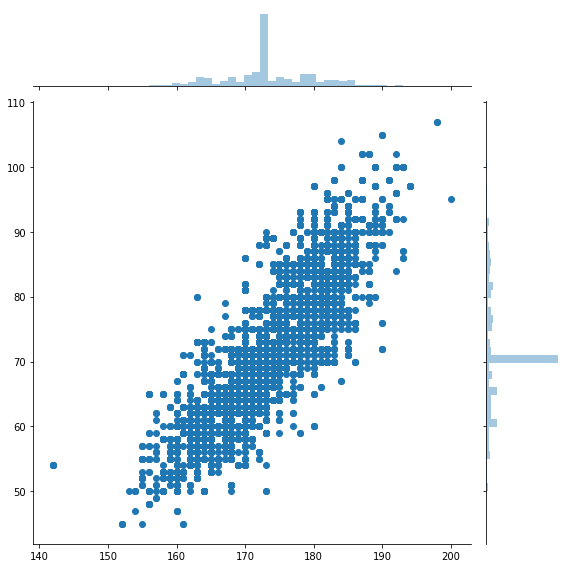

In [0]:
# Jointplot of skiWeight_train against skiHeight_train
sns.jointplot(skiHeight_train, skiWeight_train, height = 8)

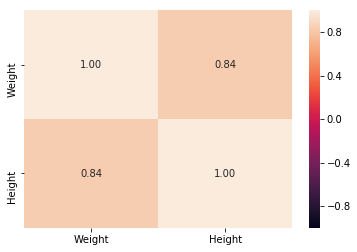

In [0]:
# Create a joint dataframe by concatenating the two variables
skiJointDF = pd.concat([skiWeight_train, skiHeight_train], axis = 1, join_axes = [skiHeight_train.index])

# Calculate the correlation between the two columns/variables
sns.heatmap(skiJointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [0]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
skiLinreg = LinearRegression()

In [0]:
# Train the Linear Regression model
skiLinreg.fit(skiHeight_train, skiWeight_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The model has been *trained* to fit the following formula.

>  Regression Problem : Weight = $a$ $\times$ Height + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [0]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', skiLinreg.intercept_)
print('Coefficients \t: a = ', skiLinreg.coef_)

Intercept 	: b =  [-138.23003206]
Coefficients 	: a =  [[1.21135182]]


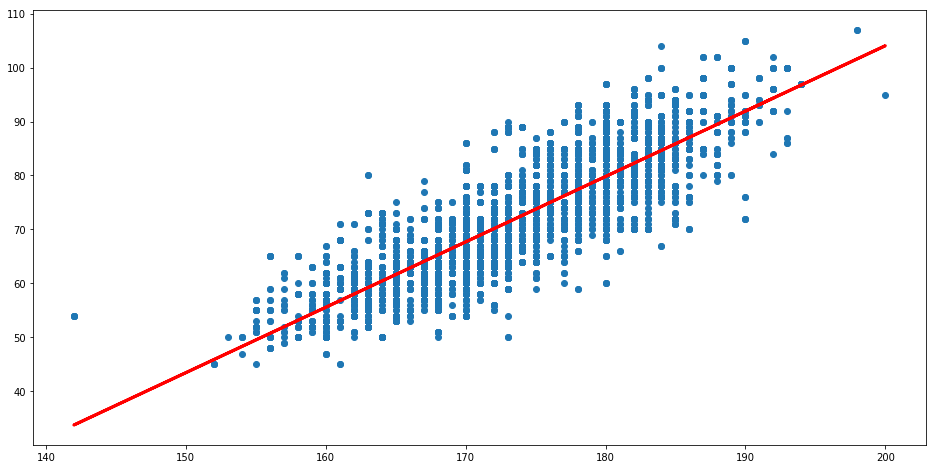

In [0]:
# Formula for the Regression line
skiRegline_x = skiHeight_train
skiRegline_y = skiLinreg.intercept_ + skiLinreg.coef_ * skiHeight_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(skiHeight_train, skiWeight_train)
plt.plot(skiRegline_x, skiRegline_y, 'r-', linewidth = 3)
plt.show()

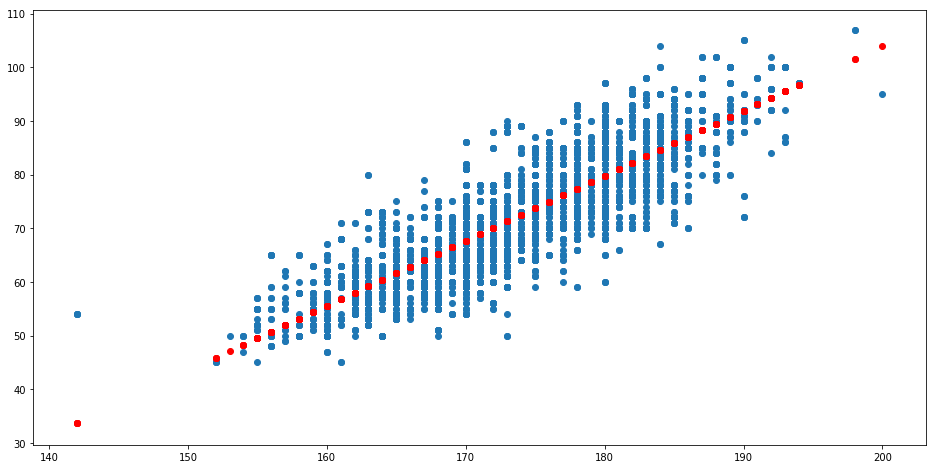

In [0]:
# Predict Total values corresponding to Height Train
ski_weight_train_pred = skiLinreg.predict(skiHeight_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(skiHeight_train, skiWeight_train)
plt.scatter(skiHeight_train, ski_weight_train_pred, color = "r")
plt.show()

Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [0]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", skiLinreg.score(skiHeight_train, skiWeight_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


skimse = mean_sq_err(skiWeight_train, ski_weight_train_pred)
print("Mean Squared Error (MSE) \t:", skimse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(skimse))

Explained Variance (R^2) 	: 0.7116934231952994
Mean Squared Error (MSE) 	: 26.561688949204893
Root Mean Squared Error (RMSE) 	: 5.153803347936831


Test the Linear Regression model `linreg` using the Test Set.

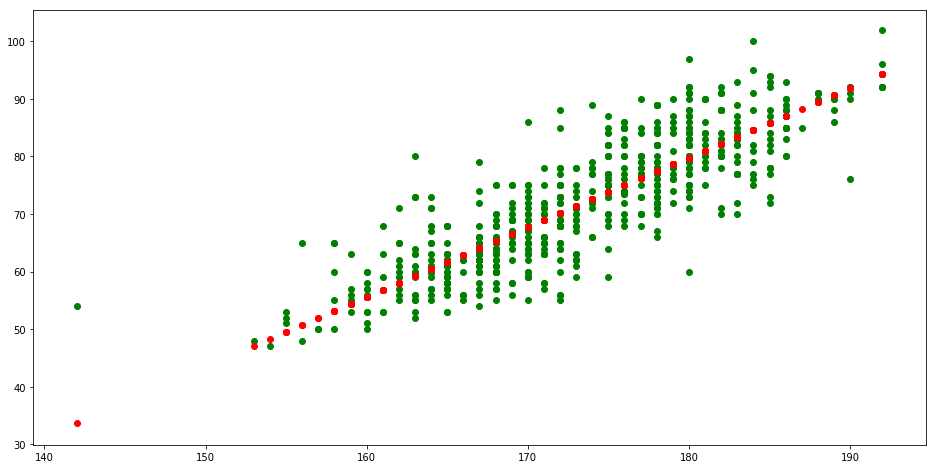

In [0]:
# Predict Weight values corresponding to Height Test
ski_weight_test_pred = skiLinreg.predict(skiHeight_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(skiHeight_test, skiWeight_test, color = "green")
plt.scatter(skiHeight_test, ski_weight_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [0]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", skiLinreg.score(skiHeight_test, skiWeight_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

skimse = mean_sq_err(skiWeight_test, ski_weight_test_pred)
print("Mean Squared Error (MSE) \t:", skimse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(skimse))

Explained Variance (R^2) 	: 0.7029731967319146
Mean Squared Error (MSE) 	: 26.35867076999691
Root Mean Squared Error (RMSE) 	: 5.13406961094188



# Prediction whether an athlete win or not

Randomforest model

What the function predict_for_year does:

  >Print the top 5 country earning medal for the sport.
  
  >Print the shape of the train set and test set.
  
  >Print classification report for the test set and the year set.
  
  >Print predicted top 5 winning medal country.
  
  >Print 5 athletes have highest winning chances in each event (if top_5_ath_all_event == True )
  
  >Print highest event an athlete have winning chance (if pass athlete's name)
  
  >Return f1 macro score of test set

 The function f1 score table:
 
 >Run predict for year for all sport and print top 10 fposrt have highest f1 macro score
 




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


def preprocessing1(X, column):
    new_column = 'enc_' + column
    le.fit(X[column].unique())
    X[new_column] = le.transform(X[column])


def predict_for_year(Sport, Sex, name=None, year=2016, gridscv=False, top_5_ath_all_event=False, heat_map=True):
    data = pd.read_csv('athlete_events.csv')
    if Sport not in data.Sport.unique():
        print("The sport does not in Olympic")
        return 0

    # drop nan value and change medal two only 2 categorizes
    sport = pd.DataFrame(data[data.Sport == Sport])
    sport = pd.DataFrame(sport[sport.Sex == Sex])
    sport.fillna(0, inplace=True)
    use_0 = pd.DataFrame(sport[sport.Age != 0])
    use_1 = pd.DataFrame(use_0[use_0.Height != 0])
    sport_use = pd.DataFrame(use_1[use_1.Weight != 0])
    sport_use['Medal'].values[(sport_use['Medal'] != 0)] = 'Medal'
    sport_use['Medal'].values[(sport_use['Medal'] == 0)] = 'Non_medal'

    # print best 5 country table
    data_year = pd.DataFrame(sport_use[sport_use.Year == year])

    if Sport not in data_year.Sport.unique():
        print("The sport does not in", year, "Olympic")
        return 0
    medal_true = pd.crosstab(data_year.NOC, data_year.Medal)
    medal_true = pd.DataFrame(medal_true.sort_values(by='Medal', ascending=False))
    print("Top 5 winning medal country")
    print(medal_true.head(5))

    # create list to use in future
    name_list = pd.DataFrame(data_year['Name'])
    event_list = pd.DataFrame(data_year['Event'])
    NOC_list = pd.DataFrame(data_year['NOC'])

    preprocessing1(sport_use, "Event")
    preprocessing1(sport_use, "Name")
    preprocessing1(sport_use, "NOC")
    preprocessing1(sport_use, 'Medal')

    data_year = pd.DataFrame(sport_use[sport_use.Year == year])
    data_not_year = pd.DataFrame(sport_use[sport_use.Year != year])

    # Split the Dataset into Train and Test and year set

    feat_not_year = pd.DataFrame(data_not_year[["Age", "Height", "Weight", "enc_NOC", "enc_Event"]])
    X_year = pd.DataFrame(data_year[["Age", "Height", "Weight", "enc_NOC", "enc_Event"]])
    label_not_year = pd.DataFrame(data_not_year["enc_Medal"])
    y_year = pd.DataFrame(data_year["enc_Medal"])
    X_train, X_test, y_train, y_test = train_test_split(feat_not_year, label_not_year, test_size=0.25)

    # Check the sample sizes
    print("Train Set :", y_train.shape, X_train.shape)
    print("Test Set  :", y_test.shape, X_test.shape)
    if (y_train.shape[0] == 0 or y_test.shape[0] == 0):
        print("No sample")
        return 0

    # create model with gridsearchcv or not

    if gridscv:
        clf = RandomForestClassifier(n_estimators=10, class_weight='balanced')

        # Choose some parameter combinations to try
        parameters = {'n_estimators': [10],
                      'max_depth': [None, 2, 5],
                      'criterion': ['entropy', 'gini'],
                      'min_samples_split': [0.5, 2, 5, 10],
                      'min_samples_leaf': [1, 5, 10, 15],
                      'max_features': [1, 3, 'log2', 'sqrt', None]
                      }

        grid_search = GridSearchCV(clf, parameters, scoring='f1_macro', cv=5)
        clf_model = grid_search.fit(X_train, y_train.values.ravel())
        print('Best score: %0.3f' % clf_model.best_score_)
        print('Best parameters set:')
        best_parameters = clf_model.best_estimator_.get_params()
        for param_name in sorted(parameters.keys()):
            print('\t%s: %r' % (param_name, best_parameters[param_name]))
    else:
        clf_model = RandomForestClassifier(n_estimators=10)
        clf_model.fit(X_train, y_train.values.ravel())

    # Prediction
    y_train_pred = clf_model.predict(X_train)
    y_test_pred = clf_model.predict(X_test)
    y_year_pred = clf_model.predict(X_year)

    print("Report for test set for", Sport, "('0' is earn medal):")
    print(classification_report(y_test, y_test_pred))
    f1_macro = f1_score(y_test, y_test_pred, average="macro")
    print()
    print("Report for", year, " year set for", Sport, "('0' is earn medal):")
    print(classification_report(y_year, y_year_pred))
    print()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", clf_model.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", clf_model.score(X_test, y_test))
    print()

    print("Goodness of Fit of Model \t", year, "Dataset")
    print("Classification Accuracy \t:", clf_model.score(X_year, y_year))
    print()

    # Plot the Confusion Matrix for Train and Test

    if heat_map:
        f, axes = plt.subplots(1, 3, figsize=(18, 4))
        sb.heatmap(confusion_matrix(y_train, y_train_pred),
                   annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
        sb.heatmap(confusion_matrix(y_test, y_test_pred),
                   annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
        sb.heatmap(confusion_matrix(y_year, y_year_pred),
                   annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[2])
        plt.show()

    """
    Explain about the heat map
    The columns are predicted label
    The rows are true label
    0 is earn medal , 1 is not earn medal"""

    # prob highest chance of winning in different event
    medal_prob = pd.DataFrame(clf_model.predict_proba(X_year))

    index_list = pd.Series([ele for ele in range(0, medal_prob[0].count())])
    name_list = name_list.set_index([index_list])
    event_list = event_list.set_index([index_list])
    medal_prob = medal_prob.join(name_list, lsuffix='_caller', rsuffix='_other')
    medal_prob = medal_prob.join(event_list, lsuffix='_caller', rsuffix='_other')

    # print the 5 athletes have highest winning chance in each event
    if top_5_ath_all_event:
        for ele in medal_prob['Event'].unique():
            print(ele)
            event_data = pd.DataFrame(medal_prob[medal_prob.Event == ele])
            event_data = event_data.sort_values(by=[0], ascending=False)
            print(event_data.loc[:, [0, 'Name']].head(5))
            print()

    # print top 5 predicted winning country in each event

    NOC_list = NOC_list.set_index([index_list])
    country_medal = pd.DataFrame(NOC_list)
    country_medal['Medal'] = y_year_pred
    if 0 in country_medal.Medal.unique():
        medal_pred = pd.crosstab(country_medal.NOC, country_medal.Medal)
        medal_pred = medal_pred.sort_values(by=0, ascending=False)
        print("Predicted top 5 medal winning country")
        print(medal_pred.head(5))

    # predict which even should an athlete participate:
    if name != None:
        if name in data_year['Name'].unique():
            data_athelete = pd.DataFrame(data_year[data_year['Name'] == name])
            data_athelete = pd.DataFrame(data_athelete[["Age", "Height", "Weight", "NOC", "Event", "Name", "enc_NOC"]].head(1))

            le.fit(data_year.Event.unique())
            ans = pd.DataFrame(columns=["Name", "Event", "Wining_prob"])
            for ele in data_year['Event'].unique():
                data_athelete.iloc[0, 4] = ele
                data_athelete['enc_Event'] = le.transform(data_athelete['Event'])
                ath_train = pd.DataFrame(data_athelete[["Age", "Height", "Weight", "enc_NOC", "enc_Event"]])
                prob = clf_model.predict_proba(ath_train)
                new_row = pd.Series([name, ele, prob[0][0]], index=ans.columns)
                ans = ans.append(new_row, ignore_index=True)
            ans = ans.sort_values(by="Wining_prob", ascending=False)
            print(ans.head(10))
            print(ans['Event'].head(10))
        else:
            print("The athlete does not participate this sport")

    return (f1_macro)


def f1_score_table(year=2016, gridscv=False):
    o_data = pd.read_csv('athlete_events.csv')
    data_year = pd.DataFrame(o_data[o_data.Year == year])
    sport_f1_table = pd.DataFrame(columns=["Sport", "Macro f1-score"])
    for ele in data_year.Sport.unique():
        f1 = predict_for_year(ele, Sex='M', gridscv=gridscv, year=year, heat_map=False)
        new_row = pd.Series([ele, f1], index=sport_f1_table.columns)
        sport_f1_table = sport_f1_table.append(new_row, ignore_index=True)
    sport_f1_table = sport_f1_table.sort_values(by="Macro f1-score", ascending=False)
    print(sport_f1_table.head(10))


f1_score_table(year=2014)


Top 5 winning medal country
Medal  Medal  Non_medal
NOC                    
CAN       24          0
FIN       24          0
SWE       23          0
AUT        0         24
CZE        0         25
Train Set : (2655, 1) (2655, 5)
Test Set  : (885, 1) (885, 5)
Report for test set for Ice Hockey ('0' is earn medal):
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       223
           1       0.86      0.83      0.84       662

   micro avg       0.77      0.77      0.77       885
   macro avg       0.70      0.71      0.70       885
weighted avg       0.78      0.77      0.77       885


Report for 2014  year set for Ice Hockey ('0' is earn medal):
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        71
           1       0.85      0.85      0.85       214

   micro avg       0.77      0.77      0.77       285
   macro avg       0.69      0.69      0.69       285
weighted avg       0.77 

Top 5 winning medal country
Medal  Medal  Non_medal
NOC                    
SWE       11         10
RUS        9         13
FRA        4         16
NOR        2         13
SUI        2         18
Train Set : (3027, 1) (3027, 5)
Test Set  : (1010, 1) (1010, 5)
Report for test set for Cross Country Skiing ('0' is earn medal):
              precision    recall  f1-score   support

           0       0.40      0.34      0.37        80
           1       0.94      0.96      0.95       930

   micro avg       0.91      0.91      0.91      1010
   macro avg       0.67      0.65      0.66      1010
weighted avg       0.90      0.91      0.90      1010


Report for 2014  year set for Cross Country Skiing ('0' is earn medal):
              precision    recall  f1-score   support

           0       0.19      0.10      0.13        30
           1       0.93      0.97      0.95       376

   micro avg       0.90      0.90      0.90       406
   macro avg       0.56      0.53      0.54       406
we

Top 5 winning medal country
Medal  Medal  Non_medal
NOC                    
LAT        1          1
RUS        1          2
USA        1          2
AUS        0          1
AUT        0          2
Train Set : (61, 1) (61, 5)
Test Set  : (21, 1) (21, 5)
Report for test set for Skeleton ('0' is earn medal):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        19

   micro avg       0.90      0.90      0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21


Report for 2014  year set for Skeleton ('0' is earn medal):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.88      0.96      0.92        24

   micro avg       0.85      0.85      0.85        27
   macro avg       0.44      0.48      0.46        27
weighted avg       0.79      0.85 

C:\Users\Jeswin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jeswin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jeswin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jeswin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Top 5 winning medal country
Medal  Medal  Non_medal
NOC                    
USA        6          8
RUS        6         10
LAT        4          8
SUI        2          6
AUT        0          7
Train Set : (1409, 1) (1409, 5)
Test Set  : (470, 1) (470, 5)
Report for test set for Bobsleigh ('0' is earn medal):
              precision    recall  f1-score   support

           0       0.63      0.47      0.54        62
           1       0.92      0.96      0.94       408

   micro avg       0.89      0.89      0.89       470
   macro avg       0.78      0.71      0.74       470
weighted avg       0.88      0.89      0.89       470


Report for 2014  year set for Bobsleigh ('0' is earn medal):
              precision    recall  f1-score   support

           0       0.13      0.11      0.12        18
           1       0.90      0.92      0.91       165

   micro avg       0.84      0.84      0.84       183
   macro avg       0.52      0.52      0.52       183
weighted avg       0.83   

<Figure size 1800x400 with 6 Axes>

Swimming Men's 100 metres Freestyle
            0                    Name
169  0.921820    Caeleb Remel Dressel
7    0.871951  Nathan Ghar-Jun Adrian
389  0.705462     Ari-Pekka Liukkonen
98   0.530698           Kyle Chalmers
117  0.430318        Santo Condorelli

Swimming Men's 50 metres Freestyle
            0                        Name
6    0.874118      Nathan Ghar-Jun Adrian
620  0.736788  Tindwende Thierry Sawadogo
188  0.725266           Anthony Lee Ervin
329  0.652978                  Yuri Kisil
388  0.619792         Ari-Pekka Liukkonen

Swimming Men's 4 x 100 metres Freestyle Relay
       0                     Name
533  1.0            Blake Pieroni
527  1.0  Michael Fred Phelps, II
8    1.0   Nathan Ghar-Jun Adrian
191  1.0     James "Jimmy" Feigen
189  1.0        Anthony Lee Ervin

Swimming Men's 100 metres Backstroke
            0                              Name
477  0.977562                       Ryan Murphy
538  0.858179              David Edward Plummer
362  0.555771  

0.7549419605419958

In [0]:
predict_for_year("Swimming", Sex='M', name='Cameron van der Burgh', year=2016, gridscv=True, top_5_ath_all_event=True, heat_map=True